# **SentimentArcs (Part 5): Transformer Models**

```
Jon Chun
12 Jun 2021: Started
12 Apr 2022: Last Update
```

In [1]:
# Make sure using a GPU

# Tesla V100 = (3.0 x) P100 (2 vCPUs)
#       P100 = (1.6 x) K80  (2 vCPUs/12GB RAM)
#       P100 ~ T4 
#       K80  = (     ) NVIDA GeForce RTX 3080 Ti
#
# High RAM Colab Pro  32GB RAM     $9.99/mo
#          Colab Pro+ 52GB        $49.95/mo

# Paperspace Free & Paid JupyterLab vs Google Colab
# https://blog.paperspace.com/alternative-to-google-colab-pro/#:~:text=Most%20notable%20is%20that%20the,and%2012%20GB%20of%20RAM.&text=Meanwhile%2C%20in%20Paperspace%20Gradient%2C%20GPU,a%20Free%20or%20Paid%20instance. 
# https://www.kaggle.com/general/198232
# https://towardsdatascience.com/deep-learning-on-a-budget-450-egpu-vs-google-colab-494f9a2ff0db (3080 vs Colab)
# https://towardsdatascience.com/when-to-use-cpus-vs-gpus-vs-tpus-in-a-kaggle-competition-9af708a8c3eb (Kaggle Comp)
# https://towardsdatascience.com/google-colab-pro-is-it-worth-49-99-c542770b8e56 (Colab Pro+)
# https://www.quora.com/Which-is-better-Google-Colab-or-Kaggle-Notebook (Kaggle vs Colab GPUs)

!nvidia-smi

Sat Apr 16 02:06:13 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8    33W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# **[RESTART RUNTIME] May be Required for these Libaries**

# **[STEP 1] Manual Configuration/Setup**



In [2]:
!pip install transformers[sentencepiece]

     |â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 4.0 MB 4.2 MB/s 
     |â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 895 kB 34.2 MB/s 
     |â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 6.6 MB 32.6 MB/s 
     |â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 77 kB 2.8 MB/s 
     |â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 596 kB 35.2 MB/s 
     |â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 1.2 MB 29.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


## (Popups) Connect Google gDrive

In [3]:
# [INPUT REQUIRED]: Authorize access to Google gDrive

# Connect this Notebook to your permanent Google Drive
#   so all generated output is saved to permanent storage there

try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

if IN_COLAB:
  print("Attempting to attach your Google gDrive to this Colab Jupyter Notebook")
  drive.mount('/gdrive')
else:
  print("Your Google gDrive is attached to this Colab Jupyter Notebook")

Attempting to attach your Google gDrive to this Colab Jupyter Notebook
Mounted at /gdrive


## (3 Inputs) Define Directory Tree

In [4]:
# [CUSTOMIZE]: Change the text after the Unix '%cd ' command below (change directory)
#              to math the full path to your gDrive subdirectory which should be the 
#              root directory cloned from the SentimentArcs github repo.

# NOTE: Make sure this subdirectory already exists and there are 
#       no typos, spaces or illegals characters (e.g. periods) in the full path after %cd

# NOTE: In Python all strings must begin with an upper or lowercase letter, and only
#         letter, number and underscores ('_') characters should appear afterwards.
#         Make sure your full path after %cd obeys this constraint or errors may appear.

# #@markdown **Instructions**

# #@markdown Set Directory and Corpus names:
# #@markdown <li> Set <b>Path_to_SentimentArcs</b> to the project root in your **GDrive folder**
# #@markdown <li> Set <b>Corpus_Genre</b> = [novels, finance, social_media]
# #@markdown <li> <b>Corpus_Type</b> = [reference_corpus, new_corpus]
# #@markdown <li> <b>Corpus_Number</b> = [1-20] (id nunmber if a new_corpus)

#@markdown <hr>

# Step #1: Get full path to SentimentArcs subdir on gDrive
# =======
#@markdown **Accept default path on gDrive or Enter new one:**

Path_to_SentimentArcs = "/gdrive/MyDrive/sentimentarcs_notebooks/" #@param ["/gdrive/MyDrive/sentiment_arcs/"] {allow-input: true}


#@markdown Set this to the project root in your <b>GDrive folder</b>
#@markdown <br> (e.g. /<wbr><b>gdrive/MyDrive/research/sentiment_arcs/</b>)

#@markdown <hr>

#@markdown **Which type of texts are you cleaning?** \

Corpus_Genre = "novels" #@param ["novels", "social_media", "finance"]

# Corpus_Type = "reference" #@param ["new", "reference"]
Corpus_Type = "new" #@param ["new", "reference"]


Corpus_Number = 2 #@param {type:"slider", min:1, max:10, step:1}


#@markdown Put in the corresponding Subdirectory under **./text_raw**:
#@markdown <li> All Texts as clean <b>plaintext *.txt</b> files 
#@markdown <li> A <b>YAML Configuration File</b> describing each Texts

#@markdown Please verify the required textfiles and YAML file exist in the correct subdirectories before continuing.

print('Current Working Directory:')
%cd $Path_to_SentimentArcs

print('\n')

if Corpus_Type == 'reference':
  SUBDIR_SENTIMENT_RAW = f'sentiment_raw_{Corpus_Genre}_reference'
  SUBDIR_TEXT_CLEAN = f'text_clean_{Corpus_Genre}_reference'
else:
  SUBDIR_SENTIMENT_RAW = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_corpus{Corpus_Number}/'
  SUBDIR_TEXT_CLEAN = f'text_clean_{Corpus_Genre}_{Corpus_Type}_corpus{Corpus_Number}/'

# PATH_SENTIMENT_RAW = f'./sentiment_raw/{SUBDIR_TEXT_RAW}'
# PATH_TEXT_CLEAN = f'./text_clean/{SUBDIR_TEXT_CLEAN}'
PATH_SENTIMENT_RAW = f'./sentiment_raw/{SUBDIR_SENTIMENT_RAW}'
PATH_TEXT_CLEAN = f'./text_clean/{SUBDIR_TEXT_CLEAN}'

# TODO: Clean up
# SUBDIR_TEXT_CLEAN = PATH_TEXT_CLEAN

print(f'PATH_SENTIMENT_RAW:\n  [{PATH_SENTIMENT_RAW}]')
print(f'SUBDIR_SENTIMENT_RAW:\n  [{SUBDIR_SENTIMENT_RAW}]')

print('\n')

print(f'PATH_TEXT_CLEAN:\n  [{PATH_TEXT_CLEAN}]')
print(f'SUBDIR_TEXT_CLEAN:\n  [{SUBDIR_TEXT_CLEAN}]')

Current Working Directory:
/gdrive/MyDrive/sentimentarcs_notebooks


PATH_SENTIMENT_RAW:
  [./sentiment_raw/sentiment_raw_novels_new_corpus2/]
SUBDIR_SENTIMENT_RAW:
  [sentiment_raw_novels_new_corpus2/]


PATH_TEXT_CLEAN:
  [./text_clean/text_clean_novels_new_corpus2/]
SUBDIR_TEXT_CLEAN:
  [text_clean_novels_new_corpus2/]


# **[STEP 2] Automatic Configuration/Setup**

## (each time) Custom Libraries & Define Globals

In [5]:
# Add PATH for ./utils subdirectory

import sys
import os

!python --version

print('\n')

PATH_UTILS = f'{Path_to_SentimentArcs}utils'
PATH_UTILS

sys.path.append(PATH_UTILS)

print('Contents of Subdirectory [./sentiment_arcs/utils/]\n')
!ls $PATH_UTILS

# More Specific than PATH for searching libraries
# !echo $PYTHONPATH

Python 3.7.13


Contents of Subdirectory [./sentiment_arcs/utils/]

config_matplotlib.py   get_subdirs.py	    sentiment_analysis.py
config_seaborn.py      global_constants.py  sentiment_arcs_config.py
file_utils.py	       global_vars.py	    set_globals.py
get_fullpath.py        __init__.py	    subdir_constants.py
get_model_families.py  __pycache__	    text_cleaners_new.py
get_sentimentr.R       read_yaml.py	    text_cleaners.py
get_sentiments.py      sa_config.py


In [6]:
# Review Global Variables and set the first few

import global_vars as global_vars

global_vars.SUBDIR_SENTIMENTARCS = Path_to_SentimentArcs
global_vars.Corpus_Genre = Corpus_Genre
global_vars.Corpus_Type = Corpus_Type
global_vars.Corpus_Number = Corpus_Number

global_vars.SUBDIR_SENTIMENT_RAW = SUBDIR_SENTIMENT_RAW
global_vars.PATH_SENTIMENT_RAW = PATH_SENTIMENT_RAW

global_vars.SUBDIR_TEXT_CLEAN = SUBDIR_TEXT_CLEAN
global_vars.PATH_TEXT_CLEAN = PATH_TEXT_CLEAN

from utils import sa_config # (e.g. define TEST_WORDS_LS)

sa_config.set_globals()

global_vars.TEST_WORDS_LS
print('\n')

dir(global_vars)

['Corpus_Genre',
 'Corpus_Number',
 'Corpus_Type',
 'FNAME_SENTIMENT_RAW',
 'MIN_PARAG_LEN',
 'MIN_SENT_LEN',
 'NotebookModels',
 'PATH_SENTIMENT_RAW',
 'PATH_TEXT_CLEAN',
 'PATH_TEXT_RAW_CORPUS',
 'SLANG_DT',
 'STOPWORDS_ADD_EN',
 'STOPWORDS_DEL_EN',
 'SUBDIR_CRUXES',
 'SUBDIR_DATA',
 'SUBDIR_GRAPHS',
 'SUBDIR_SENTIMENTARCS',
 'SUBDIR_SENTIMENT_CLEAN',
 'SUBDIR_SENTIMENT_RAW',
 'SUBDIR_TEXT_CLEAN',
 'SUBDIR_TEXT_RAW',
 'SUBDIR_TIMESERIES_CLEAN',
 'SUBDIR_TIMESERIES_RAW',
 'SUBDIR_UTILS',
 'TEST_SENTENCES_LS',
 'TEST_WORDS_LS',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'corpus_texts_dt',
 'corpus_titles_dt',
 'corpus_titles_ls',
 'lexicons_dt',
 'model_ensemble_dt',
 'model_titles_dt',
 'models_titles_dt']

In [7]:
# Initialize and clean for each iteration of notebook

# dir(global_vars)

global_vars.corpus_texts_dt = {}
global_vars.corpus_titles_dt = {}

In [8]:
# Import SentimentArcs Utilities to define Directory Structure
#   based the Selected Corpus Genre, Type and Number

!pwd 
print('\n')

# from utils import sa_config # .sentiment_arcs_utils
from utils import sa_config

print('Objects in sa_config()')
print(dir(sa_config))
print('\n')

# Directory Structure for the Selected Corpus Genre, Type and Number
sa_config.get_subdirs(Path_to_SentimentArcs, Corpus_Genre, Corpus_Type, Corpus_Number, 'none')


/gdrive/MyDrive/sentimentarcs_notebooks


Objects in sa_config()
['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'get_subdirs', 'global_vars', 'set_globals']


Verify the Directory Structure:

-------------------------------

           [Corpus Genre]: novels

            [Corpus Type]: new


    [FNAME_SENTIMENT_RAW]: [NONE]




INPUTS:
-------------------------------

   [SUBDIR_SENTIMENTARCS]: /gdrive/MyDrive/sentimentarcs_notebooks/


STEP 1: Clean Text
--------------------

        [SUBDIR_TEXT_RAW]: ./text_raw/text_raw_novels_new_corpus2/

      [SUBDIR_TEXT_CLEAN]: ./text_clean/text_clean_novels_new_corpus2/


STEP 2: Get Sentiments
--------------------

   [SUBDIR_SENTIMENT_RAW]: ./sentiment_raw/sentiment_raw_novels_new_corpus2/

 [SUBDIR_SENTIMENT_CLEAN]: ./sentiment_clean/sentiemnt_clean_novels_new_corpus2/


STEP 3: Smooth Time Series and Get Crux Points
--------------------

  [SUBDIR_TIMESERIES_RAW]: ./sentiment_ra

## (each time) Read YAML Configuration for Corpus and Models 

In [9]:
# from utils import sa_config # .sentiment_arcs_utils

import yaml

from utils import read_yaml

print('Objects in read_yaml()')
print(dir(read_yaml))
print('\n')

# Directory Structure for the Selected Corpus Genre, Type and Number
read_yaml.read_corpus_yaml(Corpus_Genre, Corpus_Type, Corpus_Number)

print('SentimentArcs Model Ensemble ------------------------------\n')
model_titles_ls = global_vars.models_titles_dt.keys()
print('\n'.join(model_titles_ls))


print('\n\nCorpus Texts ------------------------------\n')
corpus_titles_ls = list(global_vars.corpus_titles_dt.keys())
print('\n'.join(corpus_titles_ls))


print(f'\n\nThere are {len(model_titles_ls)} Models in the SentimentArcs Ensemble above.\n')
print(f'\nThere are {len(corpus_titles_ls)} Texts in the Corpus above.\n')
print('\n')

global_vars.corpus_titles_dt

Objects in read_yaml()
['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'global_vars', 'read_corpus_yaml', 'yaml']


YAML Directory: text_raw/text_raw_novels_new_corpus2
YAML File: text_raw_novels_new_corpus2_info.yaml
SentimentArcs Model Ensemble ------------------------------

AutoGluon_Text
BERT_2IMDB
BERT_Dual_Coding
BERT_Multilingual
BERT_Yelp
CNN_DNN
Distilled_BERT
FLAML_AutoML
Fully_Connected_Network
HyperOpt_CNN_Flair_AutoML
LSTM_DNN
Logistic_Regression
Logistic_Regression_CV
Multilingual_CNN_Stanza_AutoML
Multinomial_Naive_Bayes
Pattern
Random_Forest
RoBERTa_Large_15DB
RoBERTa_XML_8Language
FinBERT
FinBERT_Tone
DistilRoBERTa_FinNews
SentimentR_JockersRinker
SentimentR_Jockers
SentimentR_Bing
SentimentR_NRC
SentimentR_SentiWord
SentimentR_SenticNet
SentimentR_LMcD
SentimentR_SentimentR
PySentimentR_JockersRinker
PySentimentR_Huliu
PySentimentR_NRC
PySentimentR_SentiWord
PySentimentR_SenticNet
PySentimentR_LMcD
SyuzhetR_A

{'cliu_threebodyproblem': ['The Three Body Problem by Cixin Liu', 2008, 0],
 'sking_doctorsleep': ['Doctor Sleep by Stphen King', 2013, 0],
 'tmorrison_songofsolomon': ['Song of Solomon by Toni Morrison', 1977, 0]}

In [10]:
global_vars.models_titles_dt.items()

dict_items([('AutoGluon_Text', ['autogluon', 'tradml', 'autogluon_text']), ('BERT_2IMDB', ['imdb2way', 'transformer', 'bert']), ('BERT_Dual_Coding', ['hinglish', 'transformer', 'bert']), ('BERT_Multilingual', ['nlptown', 'transformer', 'bert']), ('BERT_Yelp', ['yelp', 'transformer', 'bert']), ('CNN_DNN', ['cnn', 'dnn', 1315937]), ('Distilled_BERT', ['huggingface', 'transformer', 'bert']), ('FLAML_AutoML', ['flaml', 'tradml', 'flaml']), ('Fully_Connected_Network', ['fcn', 'dnn', 6287671]), ('HyperOpt_CNN_Flair_AutoML', ['flair', 'dnn', 0]), ('LSTM_DNN', ['lstm', 'dnn', 7109089]), ('Logistic_Regression', ['logreg', 'tradml', 'scikit']), ('Logistic_Regression_CV', ['logreg_cv', 'tradml', 'scikit']), ('Multilingual_CNN_Stanza_AutoML', ['stanza', 'dnn', 0]), ('Multinomial_Naive_Bayes', ['multinb', 'tradml', 'scikit']), ('Pattern', ['pattern', 'heuristic', 2918]), ('Random_Forest', ['rf', 'tradml', 'scikit']), ('RoBERTa_Large_15DB', ['roberta15lg', 'transformer', 'roberta']), ('RoBERTa_XML_8

In [11]:
global_vars.corpus_titles_dt

{'cliu_threebodyproblem': ['The Three Body Problem by Cixin Liu', 2008, 0],
 'sking_doctorsleep': ['Doctor Sleep by Stphen King', 2013, 0],
 'tmorrison_songofsolomon': ['Song of Solomon by Toni Morrison', 1977, 0]}

## Configure Jupyter Notebook

In [12]:
# Configure Jupyter

# To reload modules under development

# Option (a)
%load_ext autoreload
%autoreload 2
# Option (b)
# import importlib
# importlib.reload(functions.readfunctions)


# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Enable multiple outputs from one code cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display
from IPython.display import Image
from ipywidgets import widgets, interactive

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## Install Python Libraries

In [13]:
# Intentionally left blank

## Load Libraries

In [16]:
import numpy as np

from tqdm._tqdm_notebook import tqdm_notebook
import pandas as pd
tqdm_notebook.pandas()

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('max_colwidth', 100) # -1)

from glob import glob
import copy
import json

In [17]:
# Scikit Utilities, Metrics, Pipelines and Models

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


In [18]:
"""

# Define Globals

# Main data structure: Dictionary (key=text_name) of DataFrames (cols: text_raw, text_clean)
corpus_texts_dt = {}

# Verify in SentimentArcs Root Directory
os.chdir('/gdrive/MyDrive/cdh/sentiment_arcs/')

%run -i './utils/get_globals.py'

SLANG_DT.keys()
""";

## Setup Matplotlib Style

* https://matplotlib.org/stable/tutorials/introductory/customizing.html

In [19]:
# Configure Matplotlib

# View available styles
# plt.style.available

# Verify in SentimentArcs Root Directory
os.chdir(Path_to_SentimentArcs)

%run -i './utils/config_matplotlib.py'

config_matplotlib()

print('Matplotlib Configuration ------------------------------')
print('\n  (Uncomment to view)')
# plt.rcParams.keys()
print('\n  Edit ./utils/config_matplotlib.py to change')




 New figure size:  (20, 10)
Matplotlib Configuration ------------------------------

  (Uncomment to view)

  Edit ./utils/config_matplotlib.py to change


## Setup Seaborn Style

In [20]:
# Configure Seaborn

# Verify in SentimentArcs Root Directory
os.chdir(Path_to_SentimentArcs)

%run -i './utils/config_seaborn.py'

config_seaborn()

print('Seaborn Configuration ------------------------------\n')
# print('\n  Update ./utils/config_seaborn.py to display seaborn settings')





Seaborn Configuration ------------------------------



## Python Utility Functions

### (each time) Generate Convenient Data Lists

In [21]:
# Derive List of Texts in Corpus a)keys and b)full author and titles

print('Dictionary: corpus_titles_dt')
global_vars.corpus_titles_dt
print('\n')

corpus_texts_ls = list(global_vars.corpus_titles_dt.keys())
print(f'\nCorpus Texts:')
for akey in corpus_texts_ls:
  print(f'  {akey}')
print('\n')

print(f'\nNatural Corpus Titles:')
corpus_titles_ls = [x[0] for x in list(global_vars.corpus_titles_dt.values())]
for akey in corpus_titles_ls:
  print(f'  {akey}')


Dictionary: corpus_titles_dt


{'cliu_threebodyproblem': ['The Three Body Problem by Cixin Liu', 2008, 0],
 'sking_doctorsleep': ['Doctor Sleep by Stphen King', 2013, 0],
 'tmorrison_songofsolomon': ['Song of Solomon by Toni Morrison', 1977, 0]}




Corpus Texts:
  tmorrison_songofsolomon
  cliu_threebodyproblem
  sking_doctorsleep



Natural Corpus Titles:
  Song of Solomon by Toni Morrison
  The Three Body Problem by Cixin Liu
  Doctor Sleep by Stphen King


In [22]:
# Get Model Families of Ensemble

from utils.get_model_families import get_ensemble_model_famalies

global_vars.model_ensemble_dt = get_ensemble_model_famalies(global_vars.models_titles_dt)

print('\nTest: Lexicon Family of Models:')
global_vars.model_ensemble_dt['lexicon']


There are 12 Lexicon Models
  Lexicon Model #0: sentimentr_sentimentr
  Lexicon Model #1: pysentimentr_jockersrinker
  Lexicon Model #2: pysentimentr_huliu
  Lexicon Model #3: pysentimentr_nrc
  Lexicon Model #4: pysentimentr_sentiword
  Lexicon Model #5: pysentimentr_senticnet
  Lexicon Model #6: pysentimentr_lmcd
  Lexicon Model #7: syuzhetr_afinn
  Lexicon Model #8: syuzhetr_bing
  Lexicon Model #9: syuzhetr_nrc
  Lexicon Model #10: syuzhetr_syuzhetr
  Lexicon Model #11: afinn

There are 9 Heuristic Models
  Heuristic Model #0: pattern
  Heuristic Model #1: sentimentr_jockersrinker
  Heuristic Model #2: sentimentr_jockers
  Heuristic Model #3: sentimentr_bing
  Heuristic Model #4: sentimentr_nrc
  Heuristic Model #5: sentimentr_sentiword
  Heuristic Model #6: sentimentr_senticnet
  Heuristic Model #7: sentimentr_lmcd
  Heuristic Model #8: vader

There are 8 Traditional ML Models
  Traditional ML Model #0: autogluon
  Traditional ML Model #1: flaml
  Traditional ML Model #2: logreg


['sentimentr_sentimentr',
 'pysentimentr_jockersrinker',
 'pysentimentr_huliu',
 'pysentimentr_nrc',
 'pysentimentr_sentiword',
 'pysentimentr_senticnet',
 'pysentimentr_lmcd',
 'syuzhetr_afinn',
 'syuzhetr_bing',
 'syuzhetr_nrc',
 'syuzhetr_syuzhetr',
 'afinn']

### File Functions

In [23]:
# Verify in SentimentArcs Root Directory
os.chdir(Path_to_SentimentArcs)

%run -i './utils/file_utils.py'
# from utils.file_utils import *

# %run -i './utils/file_utils.py'

# TODO: Not used? Delete?
# get_fullpath(text_title_str, ftype='data_clean', fig_no='', first_note = '',last_note='', plot_ext='png', no_date=False)

# **[STEP 3] Read all Preprocessed Novels**

## Read Cleaned Text

In [42]:
# Verify cwd and subdir of Cleaned Corpus Texts

print('Current Working Directory:')
!pwd

print(f'\nSubdir with all Cleaned Texts of Corpus:\n  {SUBDIR_TEXT_CLEAN}')

print(f'\n\nFilenames of Cleaned Texts:\n')
!ls -1 {Path_to_SentimentArcs}{PATH_TEXT_CLEAN}

print('\n')

print(corpus_texts_ls)

Current Working Directory:
/gdrive/MyDrive/sentimentarcs_notebooks

Subdir with all Cleaned Texts of Corpus:
  text_clean_novels_new_corpus2/


Filenames of Cleaned Texts:

cliu_threebodyproblem.csv
sking_doctorsleep.csv
tmorrison_songofsolomon.csv


['tmorrison_songofsolomon', 'cliu_threebodyproblem', 'sking_doctorsleep']


In [43]:
"""

# Create a List (preprocessed_ls) of all preprocessed text files

# Verify in SentimentArcs Root Directory
os.chdir(Path_to_SentimentArcs)

try:
    preprocessed_ls = glob(f'{PATH_TEXT_CLEAN}/*.csv')
    preprocessed_ls = [x.split('/')[-1] for x in preprocessed_ls]
    preprocessed_ls = [x.split('.')[0] for x in preprocessed_ls]
except IndexError:
    raise RuntimeError('No csv file found')

print('\n'.join(preprocessed_ls))
print('\n')
print(f'Found {len(preprocessed_ls)} Preprocessed files in {SUBDIR_TEXT_CLEAN}')

"""

"\n\n# Create a List (preprocessed_ls) of all preprocessed text files\n\n# Verify in SentimentArcs Root Directory\nos.chdir(Path_to_SentimentArcs)\n\ntry:\n    preprocessed_ls = glob(f'{PATH_TEXT_CLEAN}/*.csv')\n    preprocessed_ls = [x.split('/')[-1] for x in preprocessed_ls]\n    preprocessed_ls = [x.split('.')[0] for x in preprocessed_ls]\nexcept IndexError:\n    raise RuntimeError('No csv file found')\n\nprint('\n'.join(preprocessed_ls))\nprint('\n')\nprint(f'Found {len(preprocessed_ls)} Preprocessed files in {SUBDIR_TEXT_CLEAN}')\n\n"

In [44]:
# Read all preprocessed text files into master DataFrame (corpus_dt)

global_vars.corpus_texts_dt = {}

for i,atext in enumerate(corpus_texts_ls):
  print(f'Processing #{i}: {atext}...')
  afile_fullpath = f'{PATH_TEXT_CLEAN}/{atext}.csv'
  print(f'               {afile_fullpath}')
  atext_df = pd.read_csv(afile_fullpath, index_col=[0])
  global_vars.corpus_texts_dt[atext] = atext_df

Processing #0: tmorrison_songofsolomon...
               ./text_clean/text_clean_novels_new_corpus2//tmorrison_songofsolomon.csv
Processing #1: cliu_threebodyproblem...
               ./text_clean/text_clean_novels_new_corpus2//cliu_threebodyproblem.csv
Processing #2: sking_doctorsleep...
               ./text_clean/text_clean_novels_new_corpus2//sking_doctorsleep.csv


In [45]:
# Verify the Text read into master Dictionary of DataFrames

global_vars.corpus_texts_dt.keys()
print('\n')
print(f'There were {len(global_vars.corpus_texts_dt)} preprocessed Text read into the Dict global_vars.corpus_texts_dt')

dict_keys(['tmorrison_songofsolomon', 'cliu_threebodyproblem', 'sking_doctorsleep'])



There were 3 preprocessed Text read into the Dict global_vars.corpus_texts_dt


In [46]:
# Check if there are any Null strings in the text_clean columns

for i, atext in enumerate(list(global_vars.corpus_texts_dt.keys())):
  print(f'\nNovel #{i}: {atext}')
  nan_ct = global_vars.corpus_texts_dt[atext].text_clean.isna().sum()
  if nan_ct > 0:
    print(f'      {nan_ct} Null strings in the text_clean column')


Novel #0: tmorrison_songofsolomon

Novel #1: cliu_threebodyproblem
      5 Null strings in the text_clean column

Novel #2: sking_doctorsleep
      76 Null strings in the text_clean column


In [47]:
# Fill in all the Null value of text_clean with placeholder 'empty_string'

for i, atext in enumerate(list(global_vars.corpus_texts_dt.keys())):
  # print(f'Novel #{i}: {atext}')
  # Fill all text_clean == Null with 'empty_string' so sentimentr::sentiment doesn't break
  global_vars.corpus_texts_dt[atext].iloc[global_vars.corpus_texts_dt[atext].text_clean.isna()] = 'empty_string'

In [48]:
# Verify DataFrame of first Text in Corpus Dictionary

global_vars.corpus_texts_dt[next(iter(global_vars.corpus_texts_dt))].head()

text_raw  \
0  The North Carolina Mutual Life Insurance agent promised to fly from Mercy to the other side of L...   
1  Two days before the event was to take place he tacked a note on the door of his little yellow ho...   
2  At 3:00 p.m. on Wednesday the 18th of February, 1931, I will take off from Mercy and fly away on...   
3                                                                                   Please forgive me.   
4                                                                                     I loved you all.   

                                                                                            text_clean  
0  the north carolina mutual life insurance agent promise to fly from mercy to the other side of la...  
1      two day before the event be to take place he tack a note on the door of his little yellow house  
2     at p be on wednesday the 18th of february i will take off from mercy and fly away on my own wing  
3                                                                                    please forgive me  
4                                                                                       i love you all

In [49]:
# [SKIP]

In [50]:
"""

print(f'Trying to find EXISTING Raw Sentiment Datafile:\n  [{FNAME_SENTIMENT_RAW}]\n  in Raw Sentiment Subdir: {SUBDIR_SENTIMENT_RAW}\n')

corpus_texts_dt = {}
subdir_sentiment_raw_ls = os.listdir(SUBDIR_SENTIMENT_RAW)

# Verify in SentimentArcs Root Directory and cd into ./utils for R programs
os.chdir('/gdrive/MyDrive/cdh/sentiment_arcs/')
!pwd

if FNAME_SENTIMENT_RAW not in subdir_sentiment_raw_ls:
  # No Existing Raw Sentiment Data, Just read in Clean Text
  print(f'No EXISTING Raw Sentiment Datafile exists, Start from Stratch...\n')

  # Create a List (texts_clean_ls) of all preprocessed text files
  try:
    texts_clean_ls = glob(f'{SUBDIR_TEXT_CLEAN}*.csv')
    texts_clean_ls = [x.split('/')[-1] for x in texts_clean_ls]
    texts_clean_ls = [x.split('.')[0] for x in texts_clean_ls]
  except IndexError:
    raise RuntimeError('No csv file found')

  # Read all preprocessed text files into master DataFrame (corpus_dt)
  for i,anovel in enumerate(texts_clean_ls):
    print(f'Processing #{i}: {anovel}...')
    afile_fullpath = f'{SUBDIR_TEXT_CLEAN}{anovel}.csv'
    print(f'               {afile_fullpath}')
    anovel_df = pd.read_csv(afile_fullpath, index_col=[0])
    corpus_texts_dt[anovel] = anovel_df

  print('\n'.join(texts_clean_ls))
  print('\n')
  print(f'Found {len(texts_clean_ls)} Preprocessed files in {SUBDIR_TEXT_CLEAN}')
else:
  # Found Existing Raw Sentiment Data with Clean Text, Read Both
  print(f'Found EXISTING  Raw Sentiment Datafile exists, Loading...\n')
  corpus_texts_dt = read_dict_dfs(in_file=FNAME_SENTIMENT_RAW, in_dir=SUBDIR_SENTIMENT_RAW)
  print(f'The  Models have Analyzed these Texts in the Corpus:\n\n  {corpus_texts_dt.keys()}\n\n')    

# Verify Corpus DataFrame
corpus_titles_ls = list(corpus_texts_dt.keys())
# corpus_texts_dt[corpus_titles_ls[0]].head()
corpus_texts_dt[corpus_titles_ls[0]].info()

""";

In [51]:
models_ls = list(set(global_vars.corpus_texts_dt[corpus_texts_ls[0]].columns) - set(['text_clean','text_raw']))
print(f'There are [{len(models_ls)} Models] Pre-Existing in the Datafile for this Notebook:\n')
models_ls
print('\n')

print(f'There are [{len(corpus_texts_ls)} Texts] in the current Corpus:\n')
corpus_titles_ls

There are [0 Models] Pre-Existing in the Datafile for this Notebook:



[]



There are [3 Texts] in the current Corpus:



['Song of Solomon by Toni Morrison',
 'The Three Body Problem by Cixin Liu',
 'Doctor Sleep by Stphen King']

## (del?) If Sentiment Time Series exist, Verify with Plots

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler

r_scaler = RobustScaler() 
z_scaler = StandardScaler()

In [ ]:
global_vars.corpus_texts_dt[corpus_texts_ls[0]].head()

In [ ]:
global_vars.corpus_texts_dt[corpus_texts_ls[0]].head()

In [ ]:
df.shape

## (del?) zScale Prior Sentiment Time Series

In [ ]:
# Plot Sentiment Time Series for all Models in this Notebook run so far

df = pd.DataFrame()

for i, atext in enumerate(corpus_texts_ls):
  col_rzscores_ls = []
  print(f"Title #{i}: {atext}")
  df = global_vars.corpus_texts_dt[atext].copy()
  numeric_cols_ls = df.select_dtypes(include=[np.number]).columns
  for anum_col_str in numeric_cols_ls:
    print(f'Processing anum_col: {anum_col_str}')
    anum_col_robust_np = r_scaler.fit_transform(df[anum_col_str].values.reshape(-1, 1) )
    anum_col_rzscore_np = z_scaler.fit_transform(anum_col_robust_np)
    anum_col_rzscore_str = f'{anum_col_str}_rzscore'
    df[anum_col_rzscore_str] = pd.Series(anum_col_rzscore_np.squeeze(-1,))
    col_rzscores_ls.append(anum_col_rzscore_str)

  print(f'df.columns: {df.columns}')
  win_10per = int(0.10 * df.shape[0])
  # df[col_rzscores_ls].rolling(win_10per, center=True, min_periods=0).mean() # .plot(title=f"Sentiment Analysis\n{global_vars.corpus_texts_dt[atext][0]}\nProcessing: SMA 10% (+ Robust IQR, zScore Scaling)")


# **[STEP 4] Transformer Models**

## Common Transformer Setup

In [34]:
from transformers import pipeline

In [35]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification  # Yelp

In [36]:
# Define all Corpus Texts & Ensemble Models as global CONSTANTS

model_family = 'transformer'

# Verify in SentimentArcs Root Directory
os.chdir(Path_to_SentimentArcs)
%run -i './utils/get_sentiments.py'

#@markdown If Model Values already exist, Recompute anyway and Overwrite?

Force_Recompute = False #@param {type:"boolean"}

# Get list Names for This Section of Python Lexicon Models

# models_lexicon_ls = ensemble_models_dt['lexicon']
models_pylex_ls = [x for x in global_vars.model_ensemble_dt[model_family]]
print(f'Lexicon Models in this Section:\n')
print(models_pylex_ls)

Lexicon Models in this Section:

['imdb2way', 'hinglish', 'nlptown', 'yelp', 'huggingface', 'roberta15lg', 'robertaxml8lang', 'finbert', 'finberttone', 'distilrobertafinnews', 't5imdb50k']


In [37]:
global_vars.corpus_texts_dt.keys()

dict_keys(['tmorrison_songofsolomon', 'cliu_threebodyproblem', 'sking_doctorsleep'])

In [38]:
"""

# from utils import sa_config (e.g. define TEST_WORDS_LS)

from utils import sa_config

sa_config.set_globals()
""";

global_vars.TEST_WORDS_LS



'\n\n# from utils import sa_config (e.g. define TEST_WORDS_LS)\n\nfrom utils import sa_config\n\nsa_config.set_globals()\n'

['Love',
 'Hate',
 'bizarre',
 'strange',
 'furious',
 'elated',
 'curious',
 'beserk',
 'gambaro']

In [39]:
global_vars.models_titles_dt

{'AFINN': ['afinn', 'lexicon', 7520],
 'AutoGluon_Text': ['autogluon', 'tradml', 'autogluon_text'],
 'BERT_2IMDB': ['imdb2way', 'transformer', 'bert'],
 'BERT_Dual_Coding': ['hinglish', 'transformer', 'bert'],
 'BERT_Multilingual': ['nlptown', 'transformer', 'bert'],
 'BERT_Yelp': ['yelp', 'transformer', 'bert'],
 'CNN_DNN': ['cnn', 'dnn', 1315937],
 'DistilRoBERTa_FinNews': ['distilrobertafinnews', 'transformer', 'roberta'],
 'Distilled_BERT': ['huggingface', 'transformer', 'bert'],
 'FLAML_AutoML': ['flaml', 'tradml', 'flaml'],
 'FinBERT': ['finbert', 'transformer', 'bert'],
 'FinBERT_Tone': ['finberttone', 'transformer', 'bert'],
 'Fully_Connected_Network': ['fcn', 'dnn', 6287671],
 'HyperOpt_CNN_Flair_AutoML': ['flair', 'dnn', 0],
 'LSTM_DNN': ['lstm', 'dnn', 7109089],
 'Logistic_Regression': ['logreg', 'tradml', 'scikit'],
 'Logistic_Regression_CV': ['logreg_cv', 'tradml', 'scikit'],
 'Multilingual_CNN_Stanza_AutoML': ['stanza', 'dnn', 0],
 'Multinomial_Naive_Bayes': ['multinb', '

In [40]:
global_vars.model_ensemble_dt.keys()

dict_keys(['lexicon', 'heuristic', 'ml', 'dnn', 'transformer'])

## **RoBERTa Large 15 Datasets (5 cats)**

In [ ]:
%%time

# NOTE: 00m11s @12:39 on 20220301 Colab Pro 

# Reset Global Dictionary
global_vars.corpus_texts_dt = {}

sa_model = None
del sa_model
sa_model = pipeline("sentiment-analysis",model="siebert/sentiment-roberta-large-english")

print(sa_model("I love this!"))

Downloading:   0%|          | 0.00/687 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.32G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/256 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/780k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

[{'label': 'POSITIVE', 'score': 0.9988656044006348}]
CPU times: user 26.9 s, sys: 4.28 s, total: 31.2 s
Wall time: 39.3 s


In [ ]:
# Define Model and Test

model_title = 'RoBERTa Large 15DB'
model_name = 'roberta15lg'
model_type = 'Transformer'

# Test Words
print(f'Testing WORD Sentiment')
print('--------------------------------------------------')
for i, aword_str in enumerate(global_vars.TEST_WORDS_LS):

  word_sentiment_fl = sa_model(aword_str)
  print(f'Word: {aword_str}\n    {word_sentiment_fl}\n')

# Test Sentences
print(f'\nTesting SENTENCE Sentiment')
print('--------------------------------------------------')
for i, asent_str in enumerate(global_vars.TEST_SENTENCES_LS):

  sent_sentiment_fl = sa_model(asent_str)
  print(f'Sentence: {asent_str}\n    {sent_sentiment_fl}\n')

Testing WORD Sentiment
--------------------------------------------------
Word: Love
    [{'label': 'POSITIVE', 'score': 0.9969683289527893}]

Word: Hate
    [{'label': 'NEGATIVE', 'score': 0.9959344863891602}]

Word: bizarre
    [{'label': 'POSITIVE', 'score': 0.9868559241294861}]

Word: strange
    [{'label': 'NEGATIVE', 'score': 0.9920816421508789}]

Word: furious
    [{'label': 'NEGATIVE', 'score': 0.9632375836372375}]

Word: elated
    [{'label': 'POSITIVE', 'score': 0.9961071610450745}]

Word: curious
    [{'label': 'POSITIVE', 'score': 0.9934197068214417}]

Word: beserk
    [{'label': 'NEGATIVE', 'score': 0.9948800802230835}]

Word: gambaro
    [{'label': 'POSITIVE', 'score': 0.9791625738143921}]


Testing SENTENCE Sentiment
--------------------------------------------------
Sentence: I hate bad evil worthless Mondays.
    [{'label': 'NEGATIVE', 'score': 0.9989356398582458}]

Sentence: I love Paris in the springtime
    [{'label': 'POSITIVE', 'score': 0.9988493919372559}]

Sente

In [ ]:
# Verify saving results to correct model name

print(f'Saving results to Model: {model_name}')

Saving results to Model: roberta15lg


In [ ]:
%%time

# NOTE:   ~40m00s @12:39 on 20220301 Colab Pro P100 (1 Novels)
#       ~1h31m00s @12:39 on 20220301 Colab Pro P100 (2 Novels)

#        3h08m00s @03:12 on 20220412 Colab Pro P100 (3 Novels/Corpus2)
#         ~00m00s @19:31 on 20220411 Colab Pro T4 (2 Novels/Corpus1)


for i, atext in enumerate(global_vars.corpus_texts_dt.keys()):
  models_ls = global_vars.corpus_texts_dt[atext].columns
  print(f"Processing #{i}: {atext}")
  if (Force_Recompute == True) or (model_name not in models_ls):
    # global_vars.corpus_texts_dt[atext][model_name] = global_vars.corpus_texts_dt[atext]['text_clean'].apply(lambda x: labelscore2fl(classifier(x), sa_model=classifier))
    global_vars.corpus_texts_dt[atext][model_name] = global_vars.corpus_texts_dt[atext]['text_clean'].apply(lambda x: labelscore2fl(sa_model(x), sa_model=model_name))
    print(f'  [{model_name}] Sentiment Recomputed and Value Updated')
  else:
    print(f'  [{model_name}] Already in DataFrame and no Forced Recompute, so no update made')

Processing #0: tmorrison_songofsolomon
  [roberta15lg] Sentiment Recomputed and Value Updated
Processing #1: cliu_threebodyproblem
  [roberta15lg] Sentiment Recomputed and Value Updated
Processing #2: sking_doctorsleep
  [roberta15lg] Sentiment Recomputed and Value Updated
CPU times: user 3h 55min 48s, sys: 53.2 s, total: 3h 56min 41s
Wall time: 1h 57min 56s


In [ ]:
# Verify Plausiblity of new Sentiment Values by Plotting

novel_indx = 0
corpus_text_str = corpus_texts_ls[novel_indx]
# amodel_str = 'huggingface' 
win_aper = 10

win_per = int((win_aper/100.)*global_vars.corpus_texts_dt[corpus_text_str][model_name].shape[0])
text_title_str = f"{global_vars.corpus_titles_dt[corpus_text_str][0]}\nSentiment Analysis: Smoothed w/SMA ({win_aper}%)\n{model_type} Model: {model_title}"
global_vars.corpus_texts_dt[corpus_text_str][model_name].rolling(win_per, center=True, min_periods=0).mean().plot(title=text_title_str)
plt.grid(True)
plt.show();

In [ ]:
# Plot all models

novel_indx = 0
corpus_text_str = corpus_texts_ls[novel_indx]
win_aper = 10

models_all_ls = list(global_vars.corpus_texts_dt[corpus_text_str].select_dtypes(include=[np.float]).columns)

win_per = int((win_aper/100.)*global_vars.corpus_texts_dt[corpus_text_str][model_name].shape[0])
text_title_str = f"{global_vars.corpus_titles_dt[corpus_text_str][0]}\nSentiment Analysis: Smoothed w/SMA ({win_aper}%)\n{model_type} Model: {model_title}"
global_vars.corpus_texts_dt[corpus_text_str][models_all_ls].rolling(win_per, center=True, min_periods=0).mean().plot(title=text_title_str)
plt.grid(True)
plt.show();

### **Save Checkpoint**

In [ ]:
# Verify in SentimentArcs Root Directory
os.chdir(Path_to_SentimentArcs)

print('Currently in SentimentArcs root directory:')
!pwd

print(f'Saving Text_Type: {Corpus_Genre}')
print(f'     Corpus_Type: {Corpus_Type}')

# Verify Subdir to save Cleaned Texts and Texts into..

print(f'\nThese Text Titles:\n')
global_vars.corpus_texts_dt.keys()

print(f'\nTo This Subdirectory:\n')
PATH_SENTIMENT_RAW


# Save sentiment values to subdir_sentiments

# os.chdir(Path_to_SentimentArcs)

if Corpus_Type == 'new':
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_corpus{Corpus_Number}_transformer_roberta15lg.json'
else:
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_reference_transformer_roberta15lg.json'

write_dict_dfs(global_vars.corpus_texts_dt, out_file=save_filename, out_dir=f'{PATH_SENTIMENT_RAW}')



Currently in SentimentArcs root directory:
/gdrive/MyDrive/sentimentarcs_notebooks
Saving Text_Type: novels
     Corpus_Type: new

These Text Titles:



dict_keys(['tmorrison_songofsolomon', 'cliu_threebodyproblem', 'sking_doctorsleep'])


To This Subdirectory:



'./sentiment_raw/sentiment_raw_novels_new_corpus2/'

Saving file to: ./sentiment_raw/sentiment_raw_novels_new_corpus2/sentiment_raw_novels_new_corpus2_transformer_roberta15lg.json


In [ ]:
# Verify json file created

!ls -altr $PATH_SENTIMENT_RAW

## **Huggingface Distill BERT SST**

In [41]:
# BUG: Cannot reuse variable name 'sa_model', causes replicated results of first model declared (e.g. roberta15lg)
# sa_model = pipeline("sentiment-analysis")


# Reset Global Dictionary
# global_vars.corpus_texts_dt = {}

sa_model = None
del sa_model
sa_model = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

In [52]:
# Define Model and Test

model_title = 'Huggingface DistilBERT'
model_name = 'huggingface'
model_type = 'Transformer'

# Test Emoji
sa_model("We are very happy to show you the ðŸ¤— Transformers library.")
print('\n\n')

# Test Words
print(f'Testing WORD Sentiment')
print('--------------------------------------------------')
for i, aword_str in enumerate(global_vars.TEST_WORDS_LS):

  word_sentiment_fl = sa_model(aword_str)
  print(f'Word: {aword_str}\n    {word_sentiment_fl}\n')

# Test Sentences
print(f'\nTesting SENTENCE Sentiment')
print('--------------------------------------------------')
for i, asent_str in enumerate(global_vars.TEST_SENTENCES_LS):

  sent_sentiment_fl = sa_model(asent_str)
  print(f'Sentence: {asent_str}\n    {sent_sentiment_fl}\n')

[{'label': 'POSITIVE', 'score': 0.9997795224189758}]




Testing WORD Sentiment
--------------------------------------------------
Word: Love
    [{'label': 'POSITIVE', 'score': 0.9998735189437866}]

Word: Hate
    [{'label': 'NEGATIVE', 'score': 0.9996899366378784}]

Word: bizarre
    [{'label': 'NEGATIVE', 'score': 0.9943822622299194}]

Word: strange
    [{'label': 'NEGATIVE', 'score': 0.9787243008613586}]

Word: furious
    [{'label': 'NEGATIVE', 'score': 0.999466598033905}]

Word: elated
    [{'label': 'POSITIVE', 'score': 0.9998383522033691}]

Word: curious
    [{'label': 'POSITIVE', 'score': 0.9969179630279541}]

Word: beserk
    [{'label': 'POSITIVE', 'score': 0.5606897473335266}]

Word: gambaro
    [{'label': 'POSITIVE', 'score': 0.9166504144668579}]


Testing SENTENCE Sentiment
--------------------------------------------------
Sentence: I hate bad evil worthless Mondays.
    [{'label': 'NEGATIVE', 'score': 0.9908758401870728}]

Sentence: I love Paris in the springtime
    [{'label': 'POSITIVE', 'score': 0.9998341798782349}]

Sen

In [53]:
# Verify saving results to correct model name

print(f'Saving results to Model: {model_name}')

Saving results to Model: huggingface


In [ ]:
%%time

# NOTE: 

# NOTE:   10m25s @02:48 on 20220304 Colab Pro T4 (2 Novels ~1k sents each)
#         24m26s @08:58 on 20220412 Colab Pro P100 (3 Novels: 1.2M, 1.3M, 1.7M)
#         24m17s @11:20 on 20220412 Colab Pro P100 (3 Novels: 1.2M, 1.3M, 1.7M)
#          8m49s @13:52 on 20220412 Colab Pro T4 (2 Novels: 1M, 1.1M)

#        3m05s 22:10 on 20220415 Colab Pro K80 (3 Novels, 628k, 662k, 897k)

for i, atext in enumerate(global_vars.corpus_texts_dt.keys()):
  models_ls = global_vars.corpus_texts_dt[atext].columns
  print(f"Processing #{i}: {atext}")
  if (Force_Recompute == True) or (model_name not in models_ls):
    global_vars.corpus_texts_dt[atext][model_name] = global_vars.corpus_texts_dt[atext]['text_clean'].apply(lambda x: labelscore2fl(sa_model(x), sa_model='huggingface'))
    print(f'  [{model_name}] Sentiment Recomputed and Value Updated')
  else:
    print(f'  [{model_name}] Already in DataFrame and no Forced Recompute, so no update made')

Processing #0: tmorrison_songofsolomon


In [ ]:
global_vars.corpus_texts_dt[corpus_texts_ls[0]].head()

In [ ]:
# Plot all models

models_all_ls = list(global_vars.corpus_texts_dt[corpus_texts_ls[0]].select_dtypes(include=[np.float]).columns)

global_vars.corpus_texts_dt['corpus_texts_ls[0]][models_all_ls].rolling(600, center=True, min_periods=0).mean().plot()
plt.grid(True)
plt.show();

In [ ]:
global_vars.corpus_titles_dt.keys()

In [ ]:
global_vars.corpus_texts_dt[corpus_text_str][model_name].shape[0]

In [ ]:
global_vars.corpus_texts_dt[corpus_text_str]  # [novel_indx]

In [ ]:
global_vars.corpus_titles_dt.keys()

In [ ]:
# Verify Plausiblity of new Sentiment Values by Plotting

novel_indx = 0
corpus_text_str = corpus_texts_ls[novel_indx]
# amodel_str = 'huggingface' 
win_aper = 10

win_per = int((win_aper/100.)*global_vars.corpus_texts_dt[corpus_text_str][model_name].shape[0])
# print(f'win_per: {win_per}')
text_title_str = f"{global_vars.corpus_titles_dt[corpus_text_str][0]}\nSentiment Analysis: Smoothed w/SMA ({win_aper}%)\n{model_type} Model: {model_title}"
# print(f'text_title_str: {text_title_str}')
global_vars.corpus_texts_dt[corpus_text_str][model_name].rolling(win_per, center=True, min_periods=0).mean().plot(title=text_title_str)
plt.grid(True)
plt.show();

### **Save Checkpoint**

In [ ]:
# Verify in SentimentArcs Root Directory
os.chdir(Path_to_SentimentArcs)

print('Currently in SentimentArcs root directory:')
!pwd

print(f'Saving Text_Type: {Corpus_Genre}')
print(f'     Corpus_Type: {Corpus_Type}')

# Verify Subdir to save Cleaned Texts and Texts into..

print(f'\nThese Text Titles:\n')
global_vars.corpus_texts_dt.keys()

print(f'\nTo This Subdirectory:\n')
PATH_SENTIMENT_RAW


# Save sentiment values to subdir_sentiments

# os.chdir(Path_to_SentimentArcs)

if Corpus_Type == 'new':
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_corpus{Corpus_Number}_transformer_huggingface.json'
else:
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_reference_transformer_huggingface.json'

write_dict_dfs(global_vars.corpus_texts_dt, out_file=save_filename, out_dir=f'{PATH_SENTIMENT_RAW}')



In [ ]:
# Filter out all models but Current One 

current_model_dt = {}
cols_current_model_ls = []

for i, atext in enumerate(corpus_texts_ls):
  print(f'\n\nModel #{i}: {amodel}')
  # print(f'      {corpus_texts_dt[amodel].info()}')
  cols_current_model_ls = [x for x in global_vars.corpus_texts_dt[amodel].columns if 'huggingface' in x]
  cols_current_model_ls = ['text_raw', 'text_clean'] + cols_current_model_ls
  # print(f'      {cols_current_model_ls}')
  current_model_dt[atext] = corpus_texts_dt[atext][cols_current_model_ls]
  current_model_dt[atext].columns



In [ ]:
# write_dict_dfs(global_vars.corpus_texts_dt, out_file=save_filename, out_dir=f'{PATH_SENTIMENT_RAW}')

write_dict_dfs(current_model_dt, out_file=save_filename, out_dir=f'{PATH_SENTIMENT_RAW}')

In [ ]:
# Verify json file created

!ls -altr $PATH_SENTIMENT_RAW

## **NLPTown Multilingual BERT (5 cats)**

In [ ]:
# NLPTown: Multilingual trained BERT Model

# Reset Global Dictionary
global_vars.corpus_texts_dt = {}

sa_model = None
del sa_model
sa_model = pipeline("sentiment-analysis",model="nlptown/bert-base-multilingual-uncased-sentiment")

# Test
# print(sa_nlptown("I love this!"))
print(sa_model("I love this!"))

NameError: ignored

In [ ]:
# Define Model and Test

model_title = 'NLPTown MultiBERT'
model_name = 'nlptown'
model_type = 'Transformer'

# Test Emoji
sa_model("We are very happy to show you the ðŸ¤— Transformers library.")
print('\n\n')

# Test Words
print(f'Testing WORD Sentiment')
print('--------------------------------------------------')
for i, aword_str in enumerate(global_vars.TEST_WORDS_LS):

  word_sentiment_fl = sa_model(aword_str)
  print(f'Word: {aword_str}\n    {word_sentiment_fl}\n')

# Test Sentences
print(f'\nTesting SENTENCE Sentiment')
print('--------------------------------------------------')
for i, asent_str in enumerate(global_vars.TEST_SENTENCES_LS):

  sent_sentiment_fl = sa_model(asent_str)
  print(f'Sentence: {asent_str}\n    {sent_sentiment_fl}\n')

In [ ]:
# Verify saving results to correct model name

print(f'Saving results to Model: {model_name}')

In [ ]:
%%time

# NOTE:   9m05s @16:40 on 20220301 Colab Pro P100 (1 Novel: cmieville_thecityandthecity)
#        ~8m07s @16:49 on 20220201 Colab Pro P100 (1 Novel: scollins_thehungergames1)
#        25m14s @08:58 on 20220412 Colab Pro P100 (3 Novels, 1.2M, 1.3M, 1.7M)
#        25m14s @11:53 on 20220412 Colab Pro P100 (3 Novels, 1.2M, 1.3M, 1.7M)

#       ~18m30s @14:23 on 20220412 Colab Pro T4 (2 Novels: 1M, 1.1M)


for i, atext in enumerate(global_vars.corpus_texts_dt.keys()):
  models_ls = global_vars.corpus_texts_dt[atext].columns
  print(f"Processing #{i}: {atext}")
  if (Force_Recompute == True) or (model_name not in models_ls):
    global_vars.corpus_texts_dt[atext][model_name] = global_vars.corpus_texts_dt[atext]['text_clean'].apply(lambda x: labelscore2fl(sa_model(x), sa_model='nlptown'))
    print(f'  [{model_name}] Sentiment Recomputed and Value Updated')
  else:
    print(f'  [{model_name}] Already in DataFrame and no Forced Recompute, so no update made')

In [ ]:
# Verify Plausiblity of new Sentiment Values by Plotting

novel_indx = 0
corpus_text_str = corpus_titles_ls[novel_indx]
# amodel_str = 'huggingface' 
win_aper = 10

win_per = int((win_aper/100.)*global_vars.corpus_texts_dt[corpus_text_str][model_name].shape[0])
text_title_str = f"{global_vars.corpus_titles_dt[corpus_text_str][0]}\nSentiment Analysis: Smoothed w/SMA ({win_aper}%)\n{model_type} Model: {model_title}"
global_vars.corpus_texts_dt[corpus_text_str][model_name].rolling(win_per, center=True, min_periods=0).mean().plot(title=text_title_str)
plt.grid(True)
plt.show();

In [ ]:
# Plot all models

novel_indx = 0
corpus_text_str = corpus_texts_ls[novel_indx]
win_aper = 10

models_all_ls = list(global_vars.corpus_texts_dt[corpus_text_str].select_dtypes(include=[np.float]).columns)

win_per = int((win_aper/100.)*global_vars.corpus_texts_dt[corpus_text_str][model_name].shape[0])
text_title_str = f"{global_vars.corpus_titles_dt[corpus_text_str][0]}\nSentiment Analysis: Smoothed w/SMA ({win_aper}%)\n{model_type} Model: {model_title}"
global_vars.corpus_texts_dt[corpus_text_str][models_all_ls].rolling(win_per, center=True, min_periods=0).mean().plot(title=text_title_str)
plt.grid(True)
plt.show();

### **Save Checkpoint**

In [ ]:
# Verify in SentimentArcs Root Directory
os.chdir(Path_to_SentimentArcs)

print('Currently in SentimentArcs root directory:')
!pwd

print(f'Saving Text_Type: {Corpus_Genre}')
print(f'     Corpus_Type: {Corpus_Type}')

# Verify Subdir to save Cleaned Texts and Texts into..

print(f'\nThese Text Titles:\n')
global_vars.corpus_texts_dt.keys()

print(f'\nTo This Subdirectory:\n')
PATH_SENTIMENT_RAW


# Save sentiment values to subdir_sentiments

# os.chdir(Path_to_SentimentArcs)

if Corpus_Type == 'new':
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_corpus{Corpus_Number}_transformer_nlptown.json'
else:
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_reference_transformer_nlptown.json'

write_dict_dfs(global_vars.corpus_texts_dt, out_file=save_filename, out_dir=f'{PATH_SENTIMENT_RAW}')



In [ ]:
# Verify json file created

!ls -altr $PATH_SENTIMENT_RAW

## **Yelp Finetuned BERT (5 cats)**

In [ ]:
# Yelp Trained BERT Sentiment Classifier

# Reset Global Dictionary
global_vars.corpus_texts_dt = {}

# from transformers import AutoTokenizer, AutoModelForSequenceClassification (above)
tokenizer = AutoTokenizer.from_pretrained("gilf/english-yelp-sentiment")

sa_model = None
del sa_model
sa_model = AutoModelForSequenceClassification.from_pretrained("gilf/english-yelp-sentiment")

Downloading:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/748 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/413M [00:00<?, ?B/s]

In [ ]:
# Test

text_str = "I love sunny days and happy puppy dogs."
text_enc = tokenizer(text_str, return_tensors='pt')
text_sentiment = sa_model(**text_enc)
print(f'Yelp SA Model:\n  INPUT: {text_str}\n  SENTIMENT: {text_sentiment}')
print(f'  TYPE: {type(text_sentiment)}')
text_smax_ls_ls = text_sentiment.logits.softmax(dim=-1).tolist()
text_smax_ls = text_smax_ls_ls[0]
print(type(text_smax_ls[0]))
print(f'  sMAX: {text_smax_ls}')
max_val = max(text_smax_ls)
max_indx = text_smax_ls.index(max_val)
print(f'   MAX: {max_val} at indx={max_indx}')

Yelp SA Model:
  INPUT: I love sunny days and happy puppy dogs.
  SENTIMENT: SequenceClassifierOutput(loss=None, logits=tensor([[-2.6225, -1.4072,  0.8254,  1.6360,  1.3209]],
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)
  TYPE: <class 'transformers.modeling_outputs.SequenceClassifierOutput'>
<class 'float'>
  sMAX: [0.006325008347630501, 0.021322447806596756, 0.19882354140281677, 0.4471935033798218, 0.32633548974990845]
   MAX: 0.4471935033798218 at indx=3


In [ ]:
# Test

text_str = "I love sunny days and happy puppy dogs."
text_enc = tokenizer(text_str, return_tensors='pt')
text_sentiment = sa_model(**text_enc)

sentiment_val, sentiment_scale, sentiment_prob = logitstensor2sentiment(text_sentiment)
print(f'\n\nSENTENCE: {text_str}')
print(f'          Sentiment: {sentiment_val} out of {sentiment_scale} (prob={sentiment_prob:.3f})')

"\ndef logitstensor2sentiment(hugseqclass_output):\n  '''\n  Given a Huggingface SequenceClassifierOutput logits tensor\n  Return Sentiment and assoc softmax probability values\n  '''\n\n  text_smax_ls_ls = hugseqclass_output.logits.softmax(dim=-1).tolist()\n  text_smax_ls = text_smax_ls_ls[0]\n  # print(type(text_smax_ls[0]))\n  # print(f'  sMAX: {text_smax_ls}')\n  max_val = max(text_smax_ls)            # Probability based upon logits %\n  max_indx = text_smax_ls.index(max_val) # Sentiment (starting from 0 up)\n  val_scale = len(text_smax_ls)\n  # print(f'   MAX: {max_val} at indx={max_indx}')\n\n  return max_indx, val_scale, max_val\n"



SENTENCE: I love sunny days and happy puppy dogs.
          Sentiment: 3 out of 5 (prob=0.447)


In [ ]:
# Define Model and Test

model_title = 'Yelp BERT'
model_name = 'yelp'
model_type = 'Transformer'

# Test Emoji
emoji_str = "We are very happy to show you the ðŸ¤— Transformers library."
aemoji_str_enc = tokenizer(emoji_str, return_tensors='pt')
logits_tensor = sa_model(**aemoji_str_enc)
sentiment_val, sentiment_scale, sentiment_prob = logitstensor2sentiment(logits_tensor)
print(f'Emoji String: {emoji_str}\n    Sentiment: {sentiment_val} out of {sentiment_scale} (prob={sentiment_prob:.3f})\n')
print('\n\n')

# Test Words
print(f'Testing WORD Sentiment')
print('--------------------------------------------------')
for i, aword_str in enumerate(global_vars.TEST_WORDS_LS):

  aword_enc = tokenizer(aword_str, return_tensors='pt')
  logits_tensor = sa_model(**aword_enc)
  sentiment_val, sentiment_scale, sentiment_prob = logitstensor2sentiment(logits_tensor)
  print(f'Word: {aword_str}\n    Sentiment: {sentiment_val} out of {sentiment_scale} (prob={sentiment_prob:.3f})\n')

# Test Sentences
print(f'\nTesting SENTENCE Sentiment')
print('--------------------------------------------------')
for i, asent_str in enumerate(global_vars.TEST_SENTENCES_LS):

  aword_enc = tokenizer(asent_str, return_tensors='pt')
  logits_tensor = sa_model(**aword_enc)
  sentiment_val, sentiment_scale, sentiment_prob = logitstensor2sentiment(logits_tensor)
  print(f'Word: {asent_str}\n    Sentiment: {sentiment_val} out of {sentiment_scale} (prob={sentiment_prob:.3f})\n')


Emoji String: We are very happy to show you the ðŸ¤— Transformers library.
    Sentiment: 4 out of 5 (prob=0.493)




Testing WORD Sentiment
--------------------------------------------------
Word: Love
    Sentiment: 4 out of 5 (prob=0.550)

Word: Hate
    Sentiment: 0 out of 5 (prob=0.770)

Word: bizarre
    Sentiment: 2 out of 5 (prob=0.475)

Word: strange
    Sentiment: 2 out of 5 (prob=0.550)

Word: furious
    Sentiment: 0 out of 5 (prob=0.856)

Word: elated
    Sentiment: 2 out of 5 (prob=0.294)

Word: curious
    Sentiment: 2 out of 5 (prob=0.499)

Word: beserk
    Sentiment: 2 out of 5 (prob=0.370)

Word: gambaro
    Sentiment: 3 out of 5 (prob=0.543)


Testing SENTENCE Sentiment
--------------------------------------------------
Word: I hate bad evil worthless Mondays.
    Sentiment: 0 out of 5 (prob=0.297)

Word: I love Paris in the springtime
    Sentiment: 3 out of 5 (prob=0.485)

Word: It was Wednesday.
    Sentiment: 2 out of 5 (prob=0.517)

Word: You are a disgusting pi

In [ ]:
# Verify saving results to correct model name

print(f'Saving results to Model: {model_name}')

Saving results to Model: yelp


In [ ]:
global_vars.corpus_texts_dt[atext].columns

Index(['text_raw', 'text_clean'], dtype='object')

In [ ]:
corpus_texts_ls

['tmorrison_songofsolomon', 'cliu_threebodyproblem', 'sking_doctorsleep']

In [ ]:
global_vars.corpus_texts_dt.keys()

dict_keys(['tmorrison_songofsolomon', 'cliu_threebodyproblem', 'sking_doctorsleep'])

In [ ]:
%%time

# NOTE:    10m45s @17:39 on 20220301 Colab Pro P100 (1 Novel: cmieville_thecityandthecity: 10.1k sentences)
#          10m19s @17:48 on 20220301 Colab Pro P100 (1 Novel: scollins_thehungergames1: 9.0k sentences)

#          49m55s @12:45 on 20220412 Colab Pro P100 (3 Novels, 1.2M, 1.3M, 1.7M)
#          49m55s @14:54 on 20220412 Colab Pro T4 (2 Novels: 1M, 1.1M)

#          30m27s @23:32 on 20220412 Colab Pro P100 (3 Novels, 1.2M, 1.3M, 1.7M)

for i, atext in enumerate(global_vars.corpus_texts_dt.keys()):
  models_ls = global_vars.corpus_texts_dt[atext].columns
  print(f"Processing #{i}: {atext}")
  if (Force_Recompute == True) or (model_name not in models_ls):
    # corpus_texts_dt[atext][model_name] = corpus_texts_dt[atext]['text_clean'].apply(lambda x: logitstensor2sentiment(sa_yelp(**tokenizer(x, return_tensors='pt')))[0])
    global_vars.corpus_texts_dt[atext][model_name] = global_vars.corpus_texts_dt[atext]['text_clean'].apply(lambda x: logitstensor2sentiment(sa_model(**tokenizer(x, return_tensors='pt')))[0])
    print(f'  [{model_name}] Sentiment Recomputed and Value Updated')
  else:
    print(f'  [{model_name}] Already in DataFrame and no Forced Recompute, so no update made')


Processing #0: tmorrison_songofsolomon
  [yelp] Sentiment Recomputed and Value Updated
Processing #1: cliu_threebodyproblem
  [yelp] Sentiment Recomputed and Value Updated
Processing #2: sking_doctorsleep
  [yelp] Sentiment Recomputed and Value Updated
CPU times: user 1h 31s, sys: 29.4 s, total: 1h 1min
Wall time: 30min 27s


In [ ]:
# global_vars.corpus_texts_dt['tmorrison_songofsolomon']['yelp'].rolling(600, center=True, min_periods=0).mean().plot()

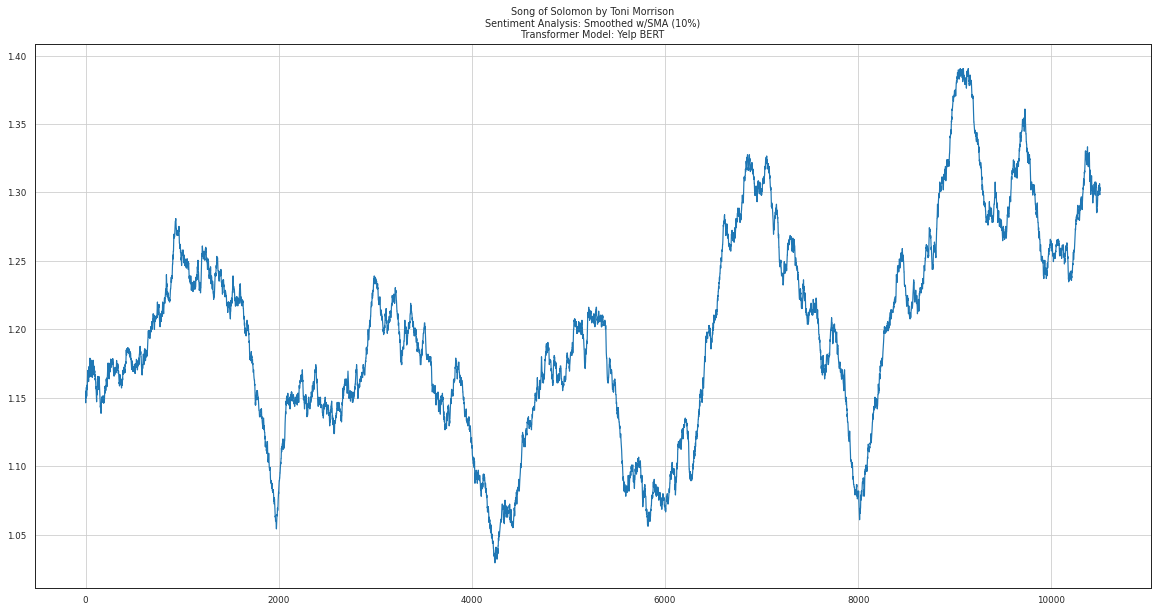

In [ ]:
# Verify Plausiblity of new Sentiment Values by Plotting

novel_indx = 0
corpus_text_str = corpus_texts_ls[novel_indx]
# amodel_str = 'huggingface' 
win_aper = 10

win_per = int((win_aper/100.)*global_vars.corpus_texts_dt[corpus_text_str][model_name].shape[0])
text_title_str = f"{global_vars.corpus_titles_dt[corpus_text_str][0]}\nSentiment Analysis: Smoothed w/SMA ({win_aper}%)\n{model_type} Model: {model_title}"
global_vars.corpus_texts_dt[corpus_text_str][model_name].rolling(win_per, center=True, min_periods=0).mean().plot(title=text_title_str)
plt.grid(True)
plt.show();

In [ ]:
global_vars.corpus_texts_dt[corpus_text_str].head()

text_raw  \
0  The North Carolina Mutual Life Insurance agent promised to fly from Mercy to the other side of L...   
1  Two days before the event was to take place he tacked a note on the door of his little yellow ho...   
2  At 3:00 p.m. on Wednesday the 18th of February, 1931, I will take off from Mercy and fly away on...   
3                                                                                   Please forgive me.   
4                                                                                     I loved you all.   

                                                                                            text_clean  \
0  the north carolina mutual life insurance agent promise to fly from mercy to the other side of la...   
1      two day before the event be to take place he tack a note on the door of his little yellow house   
2     at p be on wednesday the 18th of february i will take off from mercy and fly away on my own wing   
3                                                                                    please forgive me   
4                                                                                       i love you all   

   yelp  
0     0  
1     0  
2     4  
3     1  
4     4

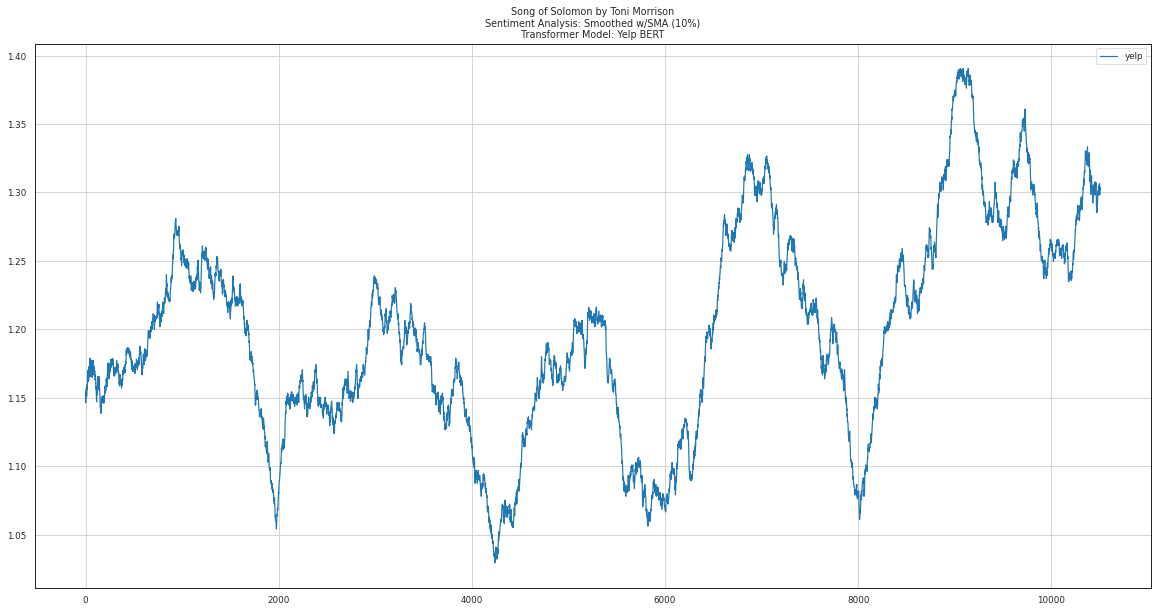

In [ ]:
# Plot all models

novel_indx = 0
corpus_text_str = corpus_texts_ls[novel_indx]
win_aper = 10

models_all_ls = list(global_vars.corpus_texts_dt[corpus_text_str].select_dtypes(include=[np.float,np.int]).columns)

win_per = int((win_aper/100.)*global_vars.corpus_texts_dt[corpus_text_str][model_name].shape[0])
text_title_str = f"{global_vars.corpus_titles_dt[corpus_text_str][0]}\nSentiment Analysis: Smoothed w/SMA ({win_aper}%)\n{model_type} Model: {model_title}"
global_vars.corpus_texts_dt[corpus_text_str][models_all_ls].rolling(win_per, center=True, min_periods=0).mean().plot(title=text_title_str)
plt.grid(True)
plt.show();

### **Save Checkpoint**

In [ ]:
# Verify in SentimentArcs Root Directory
os.chdir(Path_to_SentimentArcs)

print('Currently in SentimentArcs root directory:')
!pwd

print(f'Saving Text_Type: {Corpus_Genre}')
print(f'     Corpus_Type: {Corpus_Type}')

# Verify Subdir to save Cleaned Texts and Texts into..

print(f'\nThese Text Titles:\n')
global_vars.corpus_texts_dt.keys()

print(f'\nTo This Subdirectory:\n')
PATH_SENTIMENT_RAW


# Save sentiment values to subdir_sentiments

# os.chdir(Path_to_SentimentArcs)

if Corpus_Type == 'new':
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_corpus{Corpus_Number}_transformer_yelp.json'
else:
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_reference_transformer_yelp.json'

write_dict_dfs(global_vars.corpus_texts_dt, out_file=save_filename, out_dir=f'{PATH_SENTIMENT_RAW}')



Currently in SentimentArcs root directory:
/gdrive/MyDrive/sentimentarcs_notebooks
Saving Text_Type: novels
     Corpus_Type: new

These Text Titles:



dict_keys(['tmorrison_songofsolomon', 'cliu_threebodyproblem', 'sking_doctorsleep'])


To This Subdirectory:



'./sentiment_raw/sentiment_raw_novels_new_corpus2/'

Saving file to: ./sentiment_raw/sentiment_raw_novels_new_corpus2/sentiment_raw_novels_new_corpus2_transformer_yelp.json


In [ ]:
# Verify json file created

!ls -altr $PATH_SENTIMENT_RAW

total 51834
-rw------- 1 root root        0 Apr 10 17:52  test.txt
-rw------- 1 root root  8483161 Apr 12 13:55  all_novels_new_huggingface.json
-rw------- 1 root root  8483161 Apr 12 15:13 'Copy of sentiment_raw_novels_new_corpus2_transformer_huggingface.json'
-rw------- 1 root root 10018151 Apr 12 15:50  sentiment_raw_novels_new_corpus2_transformer_huggingface.json
-rw------- 1 root root  9989234 Apr 12 16:42  sentiment_raw_novels_new_corpus2_transformer_nlptown.json
-rw------- 1 root root  8483026 Apr 13 03:29  sentiment_raw_novels_new_corpus2_transformer_roberta.json
-rw------- 1 root root  7619669 Apr 13 04:04  sentiment_raw_novels_new_corpus2_transformer_yelp.json


## **Hinglish Mixed Code BERT (3 cats)**

In [ ]:
# Hindi-English Code Switching BERT Model

# Reset Global Dictionary
global_vars.corpus_texts_dt = {}

# from transformers import AutoTokenizer, AutoModelForSequenceClassification (above)
tokenizer = AutoTokenizer.from_pretrained("rohanrajpal/bert-base-multilingual-codemixed-cased-sentiment")

sa_model = None
del sa_model
sa_model = AutoModelForSequenceClassification.from_pretrained("rohanrajpal/bert-base-multilingual-codemixed-cased-sentiment")

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/828 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/972k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/679M [00:00<?, ?B/s]

In [ ]:
# Test

text_str = "I love sunny days and happy puppy dogs."
text_enc = tokenizer(text_str, return_tensors='pt')
text_sentiment = sa_model(**text_enc)
print(f'Hinglish SA Model:\n  INPUT: {text_str}\n  SENTIMENT: {text_sentiment}')
print(f'  TYPE: {type(text_sentiment)}')
text_smax_ls_ls = text_sentiment.logits.softmax(dim=-1).tolist()
text_smax_ls = text_smax_ls_ls[0]
print(type(text_smax_ls[0]))
print(f'  sMAX: {text_smax_ls}')
max_val = max(text_smax_ls)
max_indx = text_smax_ls.index(max_val)
print(f'   MAX: {max_val} at indx={max_indx}')

Hinglish SA Model:
  INPUT: I love sunny days and happy puppy dogs.
  SENTIMENT: SequenceClassifierOutput(loss=None, logits=tensor([[-0.8385, -2.0611,  2.9085]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)
  TYPE: <class 'transformers.modeling_outputs.SequenceClassifierOutput'>
<class 'float'>
  sMAX: [0.022890940308570862, 0.006740636192262173, 0.9703684449195862]
   MAX: 0.9703684449195862 at indx=2


In [ ]:
# Test

text_str = "I love sunny days and happy puppy dogs."
text_enc = tokenizer(text_str, return_tensors='pt')
text_sentiment = sa_model(**text_enc)

sentiment_val, sentiment_scale, sentiment_prob = logitstensor2sentiment(text_sentiment)
print(f'\n\nSENTENCE: {text_str}')
print(f'          Sentiment: {sentiment_val} out of {sentiment_scale} (prob={sentiment_prob:.3f})')



SENTENCE: I love sunny days and happy puppy dogs.
          Sentiment: 2 out of 3 (prob=0.970)


In [ ]:
# Define Model and Test

model_title = 'Hinglish Dual Code BERT'
model_name = 'hinglish'
model_type = 'Transformer'

# Test Emoji
emoji_str = "We are very happy to show you the ðŸ¤— Transformers library."
aemoji_str_enc = tokenizer(emoji_str, return_tensors='pt')
logits_tensor = sa_model(**aemoji_str_enc)
sentiment_val, sentiment_scale, sentiment_prob = logitstensor2sentiment(logits_tensor)
print(f'Emoji String: {emoji_str}\n    Sentiment: {sentiment_val} out of {sentiment_scale} (prob={sentiment_prob:.3f})\n')
print('\n\n')

# Test Words
print(f'Testing WORD Sentiment')
print('--------------------------------------------------')
for i, aword_str in enumerate(global_vars.TEST_WORDS_LS):

  aword_enc = tokenizer(aword_str, return_tensors='pt')
  logits_tensor = sa_model(**aword_enc)
  sentiment_val, sentiment_scale, sentiment_prob = logitstensor2sentiment(logits_tensor)
  print(f'Word: {aword_str}\n    Sentiment: {sentiment_val} out of {sentiment_scale} (prob={sentiment_prob:.3f})\n')

# Test Sentences
print(f'\nTesting SENTENCE Sentiment')
print('--------------------------------------------------')
for i, asent_str in enumerate(global_vars.TEST_SENTENCES_LS):

  aword_enc = tokenizer(asent_str, return_tensors='pt')
  logits_tensor = sa_model(**aword_enc)
  sentiment_val, sentiment_scale, sentiment_prob = logitstensor2sentiment(logits_tensor)
  print(f'Word: {asent_str}\n    Sentiment: {sentiment_val} out of {sentiment_scale} (prob={sentiment_prob:.3f})\n')


Emoji String: We are very happy to show you the ðŸ¤— Transformers library.
    Sentiment: 2 out of 3 (prob=0.970)




Testing WORD Sentiment
--------------------------------------------------
Word: Love
    Sentiment: 2 out of 3 (prob=0.940)

Word: Hate
    Sentiment: 1 out of 3 (prob=0.733)

Word: bizarre
    Sentiment: 2 out of 3 (prob=0.772)

Word: strange
    Sentiment: 2 out of 3 (prob=0.742)

Word: furious
    Sentiment: 2 out of 3 (prob=0.943)

Word: elated
    Sentiment: 2 out of 3 (prob=0.754)

Word: curious
    Sentiment: 2 out of 3 (prob=0.511)

Word: beserk
    Sentiment: 0 out of 3 (prob=0.702)

Word: gambaro
    Sentiment: 0 out of 3 (prob=0.601)


Testing SENTENCE Sentiment
--------------------------------------------------
Word: I hate bad evil worthless Mondays.
    Sentiment: 1 out of 3 (prob=0.880)

Word: I love Paris in the springtime
    Sentiment: 2 out of 3 (prob=0.958)

Word: It was Wednesday.
    Sentiment: 2 out of 3 (prob=0.584)

Word: You are a disgusting pi

In [ ]:
# Verify saving results to correct model name

print(f'Saving results to Model: {model_name}')

Saving results to Model: hinglish


In [ ]:
global_vars.corpus_texts_dt[atext].columns

Index(['text_raw', 'text_clean', 'yelp'], dtype='object')

In [ ]:
corpus_texts_ls

['tmorrison_songofsolomon', 'cliu_threebodyproblem', 'sking_doctorsleep']

In [ ]:
global_vars.corpus_texts_dt.keys()

dict_keys(['tmorrison_songofsolomon', 'cliu_threebodyproblem', 'sking_doctorsleep'])

In [ ]:
%%time

# NOTE:    10m45s @17:39 on 20220301 Colab Pro P100 (1 Novel: cmieville_thecityandthecity: 10.1k sentences)
#          10m19s @17:48 on 20220301 Colab Pro P100 (1 Novel: scollins_thehungergames1: 9.0k sentences)

#          49m55s @12:45 on 20220412 Colab Pro P100 (3 Novels, 1.2M, 1.3M, 1.7M)
#          49m55s @14:54 on 20220412 Colab Pro T4 (2 Novels: 1M, 1.1M)

#          30m45s @00:06 on 20220413 Colab Pro P100 (3 Novels, 1.2M, 1.3M, 1.7M)


for i, atext in enumerate(global_vars.corpus_texts_dt.keys()):
  models_ls = global_vars.corpus_texts_dt[atext].columns
  print(f"Processing #{i}: {atext}")
  if (Force_Recompute == True) or (model_name not in models_ls):
    # corpus_texts_dt[atext][model_name] = corpus_texts_dt[atext]['text_clean'].apply(lambda x: logitstensor2sentiment(sa_yelp(**tokenizer(x, return_tensors='pt')))[0])
    global_vars.corpus_texts_dt[atext][model_name] = global_vars.corpus_texts_dt[atext]['text_clean'].apply(lambda x: logitstensor2sentiment(sa_model(**tokenizer(x, return_tensors='pt')))[0])
    print(f'  [{model_name}] Sentiment Recomputed and Value Updated')
  else:
    print(f'  [{model_name}] Already in DataFrame and no Forced Recompute, so no update made')


Processing #0: tmorrison_songofsolomon
  [hinglish] Sentiment Recomputed and Value Updated
Processing #1: cliu_threebodyproblem
  [hinglish] Sentiment Recomputed and Value Updated
Processing #2: sking_doctorsleep
  [hinglish] Sentiment Recomputed and Value Updated
CPU times: user 1h 1min 5s, sys: 30.7 s, total: 1h 1min 35s
Wall time: 30min 45s


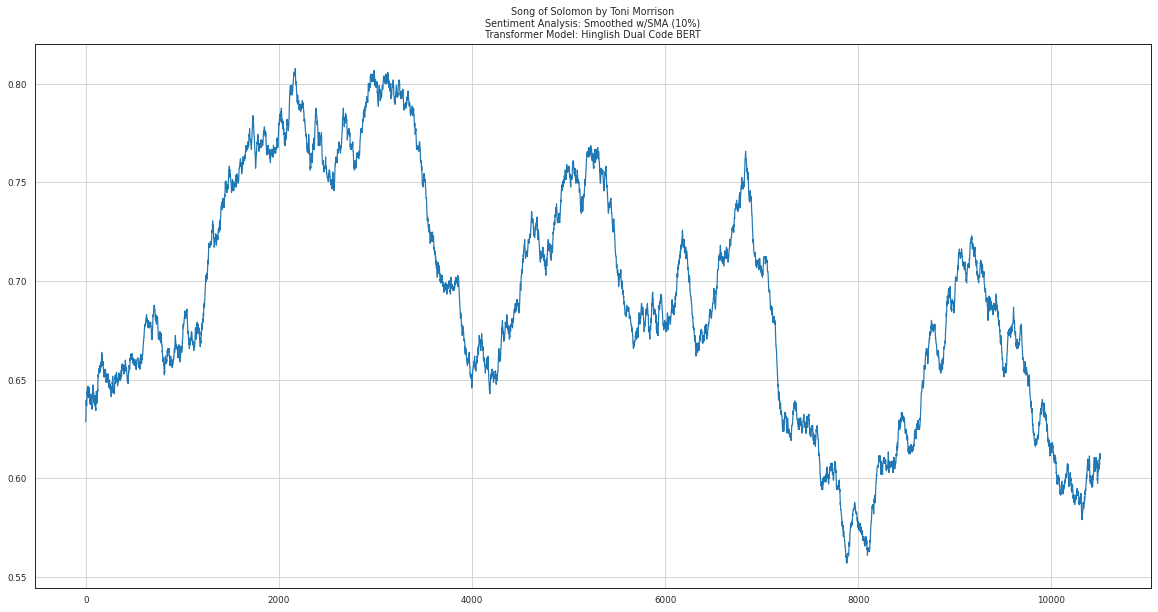

In [ ]:
# Verify Plausiblity of new Sentiment Values by Plotting

novel_indx = 0
corpus_text_str = corpus_texts_ls[novel_indx]
# amodel_str = 'huggingface' 
win_aper = 10

win_per = int((win_aper/100.)*global_vars.corpus_texts_dt[corpus_text_str][model_name].shape[0])
text_title_str = f"{global_vars.corpus_titles_dt[corpus_text_str][0]}\nSentiment Analysis: Smoothed w/SMA ({win_aper}%)\n{model_type} Model: {model_title}"
global_vars.corpus_texts_dt[corpus_text_str][model_name].rolling(win_per, center=True, min_periods=0).mean().plot(title=text_title_str)
plt.grid(True)
plt.show();

In [ ]:
global_vars.corpus_texts_dt[corpus_text_str].head()

text_raw  \
0  The North Carolina Mutual Life Insurance agent promised to fly from Mercy to the other side of L...   
1  Two days before the event was to take place he tacked a note on the door of his little yellow ho...   
2  At 3:00 p.m. on Wednesday the 18th of February, 1931, I will take off from Mercy and fly away on...   
3                                                                                   Please forgive me.   
4                                                                                     I loved you all.   

                                                                                            text_clean  \
0  the north carolina mutual life insurance agent promise to fly from mercy to the other side of la...   
1      two day before the event be to take place he tack a note on the door of his little yellow house   
2     at p be on wednesday the 18th of february i will take off from mercy and fly away on my own wing   
3                                                                                    please forgive me   
4                                                                                       i love you all   

   yelp  hinglish  
0     0         0  
1     0         0  
2     4         0  
3     1         0  
4     4         2

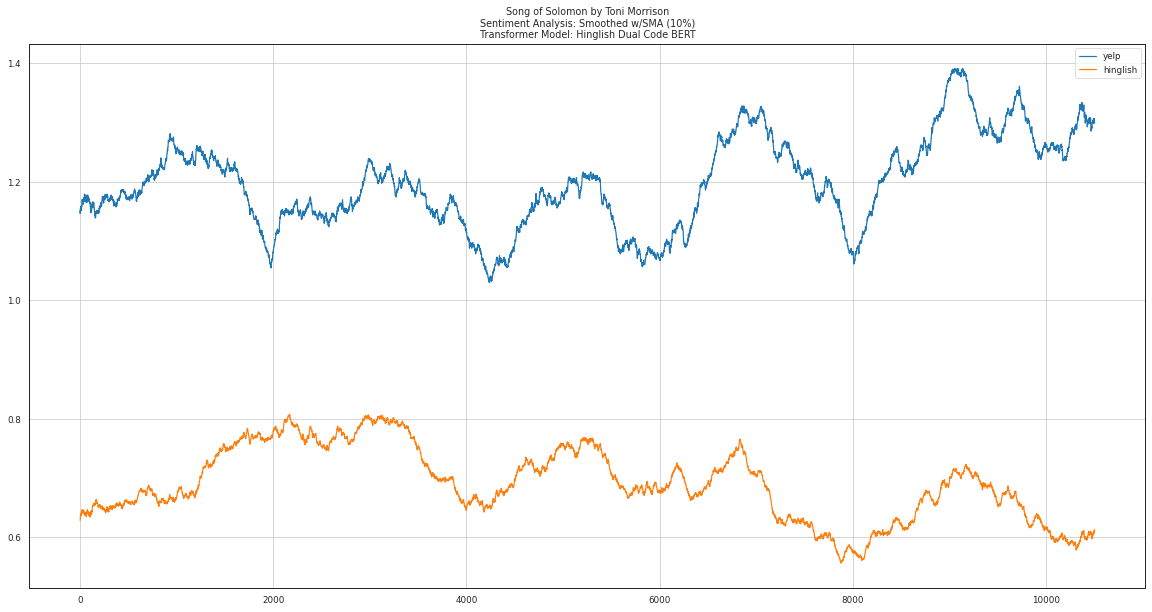

In [ ]:
# Plot all models

novel_indx = 0
corpus_text_str = corpus_texts_ls[novel_indx]
win_aper = 10

models_all_ls = list(global_vars.corpus_texts_dt[corpus_text_str].select_dtypes(include=[np.float,np.int]).columns)

win_per = int((win_aper/100.)*global_vars.corpus_texts_dt[corpus_text_str][model_name].shape[0])
text_title_str = f"{global_vars.corpus_titles_dt[corpus_text_str][0]}\nSentiment Analysis: Smoothed w/SMA ({win_aper}%)\n{model_type} Model: {model_title}"
global_vars.corpus_texts_dt[corpus_text_str][models_all_ls].rolling(win_per, center=True, min_periods=0).mean().plot(title=text_title_str)
plt.grid(True)
plt.show();

### **Save Checkpoint**

In [ ]:
# Verify in SentimentArcs Root Directory
os.chdir(Path_to_SentimentArcs)

print('Currently in SentimentArcs root directory:')
!pwd

print(f'Saving Text_Type: {Corpus_Genre}')
print(f'     Corpus_Type: {Corpus_Type}')

# Verify Subdir to save Cleaned Texts and Texts into..

print(f'\nThese Text Titles:\n')
global_vars.corpus_texts_dt.keys()

print(f'\nTo This Subdirectory:\n')
PATH_SENTIMENT_RAW


# Save sentiment values to subdir_sentiments

# os.chdir(Path_to_SentimentArcs)

if Corpus_Type == 'new':
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_corpus{Corpus_Number}_transformer_hinglish.json'
else:
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_reference_transformer_hinglish.json'

write_dict_dfs(global_vars.corpus_texts_dt, out_file=save_filename, out_dir=f'{PATH_SENTIMENT_RAW}')



Currently in SentimentArcs root directory:
/gdrive/MyDrive/sentimentarcs_notebooks
Saving Text_Type: novels
     Corpus_Type: new

These Text Titles:



dict_keys(['tmorrison_songofsolomon', 'cliu_threebodyproblem', 'sking_doctorsleep'])


To This Subdirectory:



'./sentiment_raw/sentiment_raw_novels_new_corpus2/'

Saving file to: ./sentiment_raw/sentiment_raw_novels_new_corpus2/sentiment_raw_novels_new_corpus2_transformer_hinglish.json


In [ ]:
# Verify json file created

!ls -altr $PATH_SENTIMENT_RAW

total 60207
-rw------- 1 root root        0 Apr 10 17:52  test.txt
-rw------- 1 root root  8483161 Apr 12 13:55  all_novels_new_huggingface.json
-rw------- 1 root root  8483161 Apr 12 15:13 'Copy of sentiment_raw_novels_new_corpus2_transformer_huggingface.json'
-rw------- 1 root root 10018151 Apr 12 15:50  sentiment_raw_novels_new_corpus2_transformer_huggingface.json
-rw------- 1 root root  9989234 Apr 12 16:42  sentiment_raw_novels_new_corpus2_transformer_nlptown.json
-rw------- 1 root root  8483026 Apr 13 03:29  sentiment_raw_novels_new_corpus2_transformer_roberta.json
-rw------- 1 root root  7619669 Apr 13 04:04  sentiment_raw_novels_new_corpus2_transformer_yelp.json
-rw------- 1 root root  8573903 Apr 13 04:38  sentiment_raw_novels_new_corpus2_transformer_hinglish.json


## **BERT IMDB Sentiment (2 cats)**


In [ ]:
# BERT Sentiment Classifier fine-tuned on IMDB

# Reset Global Dictionary
global_vars.corpus_texts_dt = {}

# from transformers import AutoTokenizer, AutoModelForSequenceClassification (above)
tokenizer = AutoTokenizer.from_pretrained("abhishek/autonlp-imdb_sentiment_classification-31154")

sa_model = None
del sa_model
sa_model = AutoModelForSequenceClassification.from_pretrained("abhishek/autonlp-imdb_sentiment_classification-31154")

Downloading:   0%|          | 0.00/283 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/816 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/780k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/313M [00:00<?, ?B/s]

In [ ]:
# Test

text_str = "I love sunny days and happy puppy dogs."
text_enc = tokenizer(text_str, return_tensors='pt')
text_sentiment = sa_model(**text_enc)
print(f'IMDB SA Model:\n  INPUT: {text_str}\n  SENTIMENT: {text_sentiment}')
print(f'  TYPE: {type(text_sentiment)}')
text_smax_ls_ls = text_sentiment.logits.softmax(dim=-1).tolist()
text_smax_ls = text_smax_ls_ls[0]
print(type(text_smax_ls[0]))
print(f'  sMAX: {text_smax_ls}')
max_val = max(text_smax_ls)
max_indx = text_smax_ls.index(max_val)
print(f'   MAX: {max_val} at indx={max_indx}')

IMDB SA Model:
  INPUT: I love sunny days and happy puppy dogs.
  SENTIMENT: SequenceClassifierOutput(loss=None, logits=tensor([[-2.4812,  2.5836]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)
  TYPE: <class 'transformers.modeling_outputs.SequenceClassifierOutput'>
<class 'float'>
  sMAX: [0.006275228690356016, 0.9937247633934021]
   MAX: 0.9937247633934021 at indx=1


In [ ]:
# Test

text_str = "I love sunny days and happy puppy dogs."
text_enc = tokenizer(text_str, return_tensors='pt')
text_sentiment = sa_model(**text_enc)

sentiment_val, sentiment_scale, sentiment_prob = logitstensor2sentiment(text_sentiment)
print(f'\n\nSENTENCE: {text_str}')
print(f'          Sentiment: {sentiment_val} out of {sentiment_scale} (prob={sentiment_prob:.3f})')



SENTENCE: I love sunny days and happy puppy dogs.
          Sentiment: 1 out of 2 (prob=0.994)


In [ ]:
# Define Model and Test

model_title = 'IMDB BERT'
model_name = 'imdb2way'
model_type = 'Transformer'

# Test Emoji
emoji_str = "We are very happy to show you the ðŸ¤— Transformers library."
aemoji_str_enc = tokenizer(emoji_str, return_tensors='pt')
logits_tensor = sa_model(**aemoji_str_enc)
sentiment_val, sentiment_scale, sentiment_prob = logitstensor2sentiment(logits_tensor)
print(f'Emoji String: {emoji_str}\n    Sentiment: {sentiment_val} out of {sentiment_scale} (prob={sentiment_prob:.3f})\n')
print('\n\n')

# Test Words
print(f'Testing WORD Sentiment')
print('--------------------------------------------------')
for i, aword_str in enumerate(global_vars.TEST_WORDS_LS):

  aword_enc = tokenizer(aword_str, return_tensors='pt')
  logits_tensor = sa_model(**aword_enc)
  sentiment_val, sentiment_scale, sentiment_prob = logitstensor2sentiment(logits_tensor)
  print(f'Word: {aword_str}\n    Sentiment: {sentiment_val} out of {sentiment_scale} (prob={sentiment_prob:.3f})\n')

# Test Sentences
print(f'\nTesting SENTENCE Sentiment')
print('--------------------------------------------------')
for i, asent_str in enumerate(global_vars.TEST_SENTENCES_LS):

  aword_enc = tokenizer(asent_str, return_tensors='pt')
  logits_tensor = sa_model(**aword_enc)
  sentiment_val, sentiment_scale, sentiment_prob = logitstensor2sentiment(logits_tensor)
  print(f'Word: {asent_str}\n    Sentiment: {sentiment_val} out of {sentiment_scale} (prob={sentiment_prob:.3f})\n')





Emoji String: We are very happy to show you the ðŸ¤— Transformers library.
    Sentiment: 1 out of 2 (prob=0.996)




Testing WORD Sentiment
--------------------------------------------------
Word: Love
    Sentiment: 1 out of 2 (prob=0.930)

Word: Hate
    Sentiment: 0 out of 2 (prob=0.734)

Word: bizarre
    Sentiment: 0 out of 2 (prob=0.999)

Word: strange
    Sentiment: 1 out of 2 (prob=0.966)

Word: furious
    Sentiment: 1 out of 2 (prob=0.996)

Word: elated
    Sentiment: 0 out of 2 (prob=0.995)

Word: curious
    Sentiment: 1 out of 2 (prob=0.997)

Word: beserk
    Sentiment: 1 out of 2 (prob=0.782)

Word: gambaro
    Sentiment: 1 out of 2 (prob=0.941)


Testing SENTENCE Sentiment
--------------------------------------------------
Word: I hate bad evil worthless Mondays.
    Sentiment: 0 out of 2 (prob=0.998)

Word: I love Paris in the springtime
    Sentiment: 1 out of 2 (prob=0.997)

Word: It was Wednesday.
    Sentiment: 1 out of 2 (prob=0.979)

Word: You are a disgusting pi

In [ ]:
# Verify saving results to correct model name

print(f'Saving results to Model: {model_name}')

sent_test_str = "I hate Mondays and bad doctors."
print(f"Sentence: {sent_test_str}\n {logitstensor2sentiment(sa_model(**tokenizer(sent_test_str, return_tensors='pt')))[0]}")

Saving results to Model: imdb2way
Sentence: I hate Mondays and bad doctors.
 0


In [ ]:
global_vars.corpus_texts_dt.keys()

dict_keys(['tmorrison_songofsolomon', 'cliu_threebodyproblem', 'sking_doctorsleep'])

In [ ]:
%%time

# NOTE:     4m32s @18:10 on 20220301 Colab Pro P100 (1 Novel: cmieville_thecityandthecity: 10.1k sentences)
#           4m08s @18:15 on 20220301 Colab Pro P100 (1 Novel: scollins_thehungergames1: 9.0k sentences)

#          00m00s @12:45 on 20220412 Colab Pro P100 (3 Novels, 1.2M, 1.3M, 1.7M)
#          00m00s @14:54 on 20220412 Colab Pro T4 (2 Novels: 1M, 1.1M)

#          17m03s @17:37 on 20220412 Colab Pro T4 (2 Novels: 1M, 1.1M)

#          15m07s @00:40 on 20220413 Colab Pro P100 (3 Novels, 1.2M, 1.3M, 1.7M)


for i, atext in enumerate(global_vars.corpus_texts_dt.keys()):
  models_ls = global_vars.corpus_texts_dt[atext].columns
  print(f"Processing #{i}: {atext}")
  if (Force_Recompute == True) or (model_name not in models_ls):
    # corpus_texts_dt[atext][model_name] = corpus_texts_dt[atext]['text_clean'].apply(lambda x: logitstensor2sentiment(sa_yelp(**tokenizer(x, return_tensors='pt')))[0])
    global_vars.corpus_texts_dt[atext][model_name] = global_vars.corpus_texts_dt[atext]['text_clean'].apply(lambda x: logitstensor2sentiment(sa_model(**tokenizer(x, return_tensors='pt')))[0])
    print(f'  [{model_name}] Sentiment Recomputed and Value Updated')
  else:
    print(f'  [{model_name}] Already in DataFrame and no Forced Recompute, so no update made')


Processing #0: tmorrison_songofsolomon
  [imdb2way] Sentiment Recomputed and Value Updated
Processing #1: cliu_threebodyproblem
  [imdb2way] Sentiment Recomputed and Value Updated
Processing #2: sking_doctorsleep
  [imdb2way] Sentiment Recomputed and Value Updated
CPU times: user 30min 5s, sys: 11.8 s, total: 30min 17s
Wall time: 15min 7s


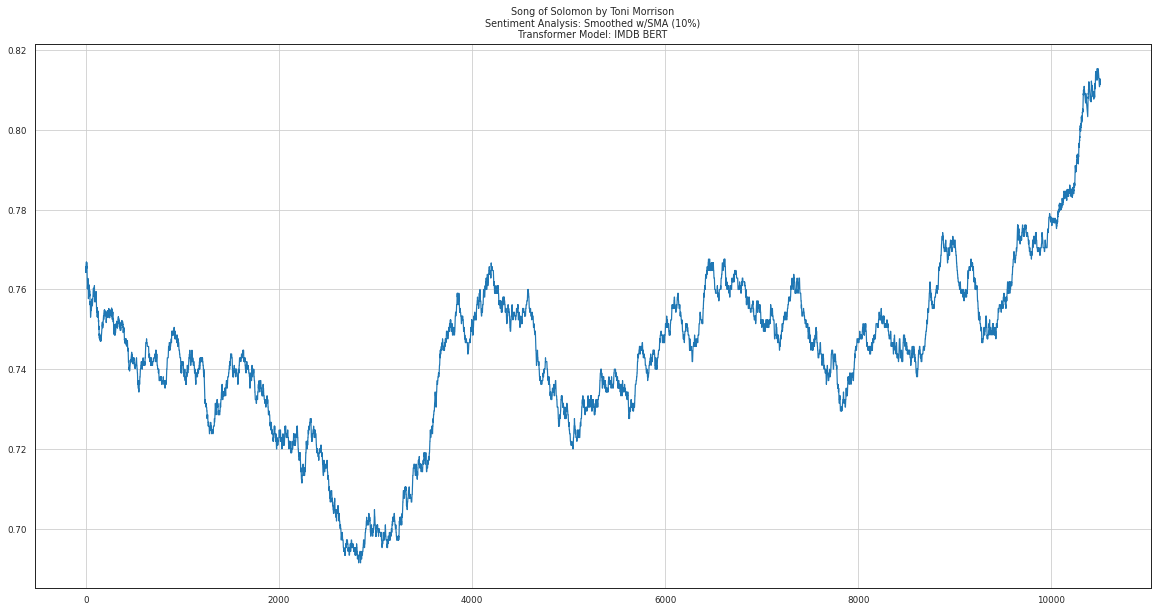

In [ ]:
# Verify Plausiblity of new Sentiment Values by Plotting

novel_indx = 0
corpus_text_str = corpus_texts_ls[novel_indx]
# amodel_str = 'huggingface' 
win_aper = 10

win_per = int((win_aper/100.)*global_vars.corpus_texts_dt[corpus_text_str][model_name].shape[0])
text_title_str = f"{global_vars.corpus_titles_dt[corpus_text_str][0]}\nSentiment Analysis: Smoothed w/SMA ({win_aper}%)\n{model_type} Model: {model_title}"
global_vars.corpus_texts_dt[corpus_text_str][model_name].rolling(win_per, center=True, min_periods=0).mean().plot(title=text_title_str)
plt.grid(True)
plt.show();

In [ ]:
global_vars.corpus_texts_dt[corpus_text_str].head()

text_raw  \
0  The North Carolina Mutual Life Insurance agent promised to fly from Mercy to the other side of L...   
1  Two days before the event was to take place he tacked a note on the door of his little yellow ho...   
2  At 3:00 p.m. on Wednesday the 18th of February, 1931, I will take off from Mercy and fly away on...   
3                                                                                   Please forgive me.   
4                                                                                     I loved you all.   

                                                                                            text_clean  \
0  the north carolina mutual life insurance agent promise to fly from mercy to the other side of la...   
1      two day before the event be to take place he tack a note on the door of his little yellow house   
2     at p be on wednesday the 18th of february i will take off from mercy and fly away on my own wing   
3                                                                                    please forgive me   
4                                                                                       i love you all   

   yelp  hinglish  imdb2way  
0     0         0         1  
1     0         0         1  
2     4         0         1  
3     1         0         1  
4     4         2         1

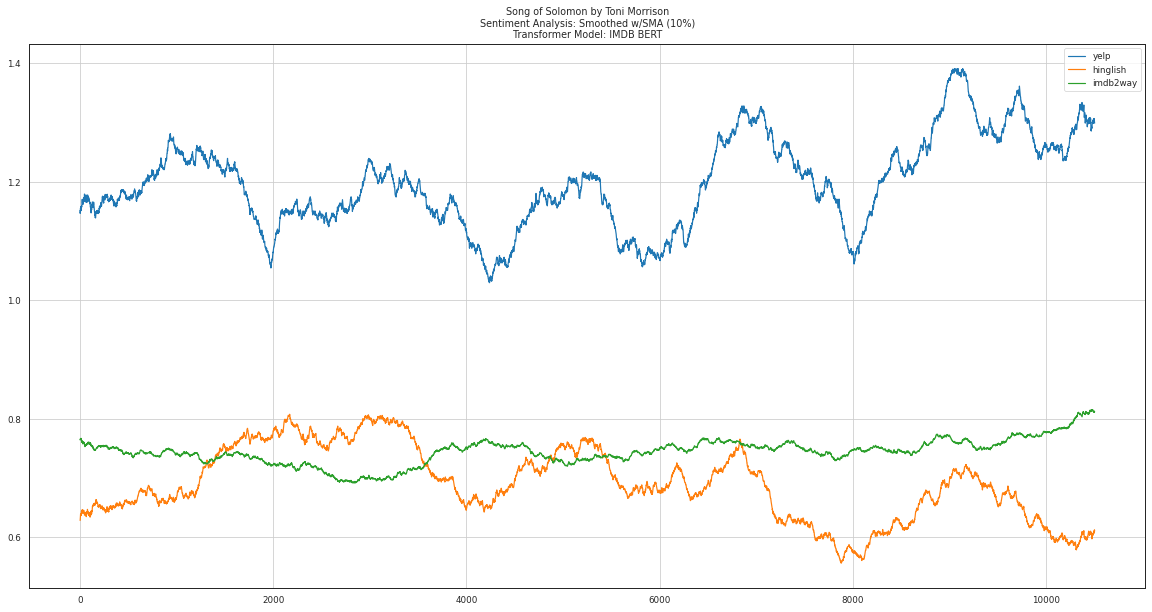

In [ ]:
# Plot all models

novel_indx = 0
corpus_text_str = corpus_texts_ls[novel_indx]
win_aper = 10

models_all_ls = list(global_vars.corpus_texts_dt[corpus_text_str].select_dtypes(include=[np.float,np.int]).columns)

win_per = int((win_aper/100.)*global_vars.corpus_texts_dt[corpus_text_str][model_name].shape[0])
text_title_str = f"{global_vars.corpus_titles_dt[corpus_text_str][0]}\nSentiment Analysis: Smoothed w/SMA ({win_aper}%)\n{model_type} Model: {model_title}"
global_vars.corpus_texts_dt[corpus_text_str][models_all_ls].rolling(win_per, center=True, min_periods=0).mean().plot(title=text_title_str)
plt.grid(True)
plt.show();

### **Save Checkpoint**

In [ ]:
# Verify in SentimentArcs Root Directory
os.chdir(Path_to_SentimentArcs)

print('Currently in SentimentArcs root directory:')
!pwd

print(f'Saving Text_Type: {Corpus_Genre}')
print(f'     Corpus_Type: {Corpus_Type}')

# Verify Subdir to save Cleaned Texts and Texts into..

print(f'\nThese Text Titles:\n')
global_vars.corpus_texts_dt.keys()

print(f'\nTo This Subdirectory:\n')
PATH_SENTIMENT_RAW


# Save sentiment values to subdir_sentiments

# os.chdir(Path_to_SentimentArcs)

if Corpus_Type == 'new':
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_corpus{Corpus_Number}_transformer_imdb2way.json'
else:
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_reference_transformer_imdb2way.json'

write_dict_dfs(global_vars.corpus_texts_dt, out_file=save_filename, out_dir=f'{PATH_SENTIMENT_RAW}')



Currently in SentimentArcs root directory:
/gdrive/MyDrive/sentimentarcs_notebooks
Saving Text_Type: novels
     Corpus_Type: new

These Text Titles:



dict_keys(['tmorrison_songofsolomon', 'cliu_threebodyproblem', 'sking_doctorsleep'])


To This Subdirectory:



'./sentiment_raw/sentiment_raw_novels_new_corpus2/'

Saving file to: ./sentiment_raw/sentiment_raw_novels_new_corpus2/sentiment_raw_novels_new_corpus2_transformer_imdb2way.json


In [ ]:
# Verify json file created

!ls -altr $PATH_SENTIMENT_RAW

total 69512
-rw------- 1 root root        0 Apr 10 17:52  test.txt
-rw------- 1 root root  8483161 Apr 12 13:55  all_novels_new_huggingface.json
-rw------- 1 root root  8483161 Apr 12 15:13 'Copy of sentiment_raw_novels_new_corpus2_transformer_huggingface.json'
-rw------- 1 root root 10018151 Apr 12 15:50  sentiment_raw_novels_new_corpus2_transformer_huggingface.json
-rw------- 1 root root  9989234 Apr 12 16:42  sentiment_raw_novels_new_corpus2_transformer_nlptown.json
-rw------- 1 root root  8483026 Apr 13 03:29  sentiment_raw_novels_new_corpus2_transformer_roberta.json
-rw------- 1 root root  7619669 Apr 13 04:04  sentiment_raw_novels_new_corpus2_transformer_yelp.json
-rw------- 1 root root  8573903 Apr 13 04:38  sentiment_raw_novels_new_corpus2_transformer_hinglish.json
-rw------- 1 root root  9528137 Apr 13 04:55  sentiment_raw_novels_new_corpus2_transformer_imdb2way.json


## **T5Base 50k Finetuned IMDB Sentiment Extraction (2 cats)**

In [ ]:
from transformers import AutoTokenizer, AutoModelWithLMHead

# Reset Global Dictionary
global_vars.corpus_texts_dt = {}

tokenizer = AutoTokenizer.from_pretrained("mrm8488/t5-small-finetuned-imdb-sentiment")

amodel = None
del amodel
amodel = AutoModelWithLMHead.from_pretrained("mrm8488/t5-small-finetuned-imdb-sentiment")

sa_model = None
del sa_model

def sa_model(text):
  input_ids = tokenizer.encode(text + '</s>', return_tensors='pt')

  output = amodel.generate(input_ids=input_ids,
               max_length=2)
  
  dec = [tokenizer.decode(ids) for ids in output]
  label = dec[0]
  return label

sa_model("I dislike a lot that film")

Downloading:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/773k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.74k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/231M [00:00<?, ?B/s]

'<pad> negative'

In [ ]:
# Test

text_str = "I love sunny days and happy puppy dogs."
res = sa_model(text_str)
# type(res)
print(f'res: [{res}]')


res: [<pad> positive]


In [ ]:
def t5str2sentiment(t5_str):
  '''
  Given a T5 text string with sentiment and tags
  Return a -1,0,1 for negative,neutral/OOV,positive sentiment
  '''

  t5_sentiment1_str = t5_str.replace('<pad>','')
  t5_sentiment2_str = t5_sentiment1_str.replace('</s>','')
  t5_core_str = t5_sentiment2_str.strip().lower()
  # print(f't5_sentiment_raw_str: {t5_sentiment_raw_str}')
  # print(f't5_sentiment_str: {t5_sentiment_str}')
  # print(f't5_core_str: {t5_core_str}')
  if t5_core_str == 'positive':
    t5_sentiment_fl = 1
  elif t5_core_str == 'negative':
    t5_sentiment_fl = -1
  elif len(t5_core_str) > 0:
    # Out of Vocab (OOV) Word
    t5_sentiment_fl = 0
  elif len(t5_core_str) == 0:
    # Empty String
    t5_sentiment_fl = 0
  else:
    print(f'ERROR: Illegal value ts_sentiment_str: {t5_sentiment_str}')

  return int(t5_sentiment_fl)

# Test
asent_str = "I love the good and kind-hearted lovely lady who give me tasty cookies."
t5_response_str = sa_model(asent_str)
asentiment_int = t5str2sentiment(t5_response_str)
print(f'STRING: {asent_str}\nSENTIMENT: {asentiment_int}')

STRING: I love the good and kind-hearted lovely lady who give me tasty cookies.
SENTIMENT: 1


In [ ]:
# Define Model and Test

model_title = 'T5 Base IMDB50K'
model_name = 't5imdb50k'
model_type = 'Transformer'

# Test Words
print(f'Testing WORD Sentiment')
print('--------------------------------------------------')
for i, aword_str in enumerate(global_vars.TEST_WORDS_LS):

  t5_sentiment_raw_str = t5str2sentiment(sa_model(aword_str))
  print(f'Word: {aword_str}\n    Sentiment: {t5_sentiment_raw_str}\n')

# Test Sentences
print(f'\nTesting SENTENCE Sentiment')
print('--------------------------------------------------')
for i, asent_str in enumerate(global_vars.TEST_SENTENCES_LS):

  t5_sentiment_raw_str = t5str2sentiment(sa_model(asent_str))
  print(f'Word: {asent_str}\n    Sentiment: {t5_sentiment_raw_str}\n')

Testing WORD Sentiment
--------------------------------------------------
Word: Love
    Sentiment: 1

Word: Hate
    Sentiment: -1

Word: bizarre
    Sentiment: 0

Word: strange
    Sentiment: -1

Word: furious
    Sentiment: 0

Word: elated
    Sentiment: -1

Word: curious
    Sentiment: 1

Word: beserk
    Sentiment: -1

Word: gambaro
    Sentiment: -1


Testing SENTENCE Sentiment
--------------------------------------------------
Word: I hate bad evil worthless Mondays.
    Sentiment: -1

Word: I love Paris in the springtime
    Sentiment: 1

Word: It was Wednesday.
    Sentiment: 1

Word: You are a disgusting pig - I hate you.
    Sentiment: -1

Word: What a delightfully funny and beautiful good man.
    Sentiment: 1

Word: That was it
    Sentiment: 0



In [ ]:
# Verify saving results to correct model name

print(f'Saving results to Model: {model_name}\n')

sent_test_str = "I hate Mondays and bad doctors."
# sent_test_str = "You are a disgusting pig - I hate you."
print(f"SENTENCE: {sent_test_str}\nSENTIMENT: {t5str2sentiment(sa_model(sent_test_str))}")

Saving results to Model: t5imdb50k

SENTENCE: I hate Mondays and bad doctors.
SENTIMENT: -1


In [ ]:
%%time

# NOTE:    10m45s @17:39 on 20220301 Colab Pro (1 Novel: cmieville_thecityandthecity: 10.1k sentences)
#          10m00s @17:48 on 20220301 Colab Pro (1 Novel: scollins_thehungergames1: 9.0k sentences)


#          15m21s @18:06 on 20220412 Colab Pro T4 (2 Novels: 1M, 1.1M)

#          15m57s @00:57 on 20220413 Colab Pro P100 (3 Novels, 1.2M, 1.3M, 1.7M)


for i, atext in enumerate(global_vars.corpus_texts_dt.keys()):
  models_ls = global_vars.corpus_texts_dt[atext].columns
  print(f"Processing #{i}: {atext}")
  if (Force_Recompute == True) or (model_name not in models_ls):
    global_vars.corpus_texts_dt[atext][model_name] = global_vars.corpus_texts_dt[atext]['text_clean'].apply(lambda x: t5str2sentiment(sa_model(x)))
    print(f'  [{model_name}] Sentiment Recomputed and Value Updated')
  else:
    print(f'  [{model_name}] Already in DataFrame and no Forced Recompute, so no update made')

Processing #0: tmorrison_songofsolomon
  [t5imdb50k] Sentiment Recomputed and Value Updated
Processing #1: cliu_threebodyproblem
  [t5imdb50k] Sentiment Recomputed and Value Updated
Processing #2: sking_doctorsleep
  [t5imdb50k] Sentiment Recomputed and Value Updated
CPU times: user 31min 42s, sys: 11.8 s, total: 31min 54s
Wall time: 15min 57s


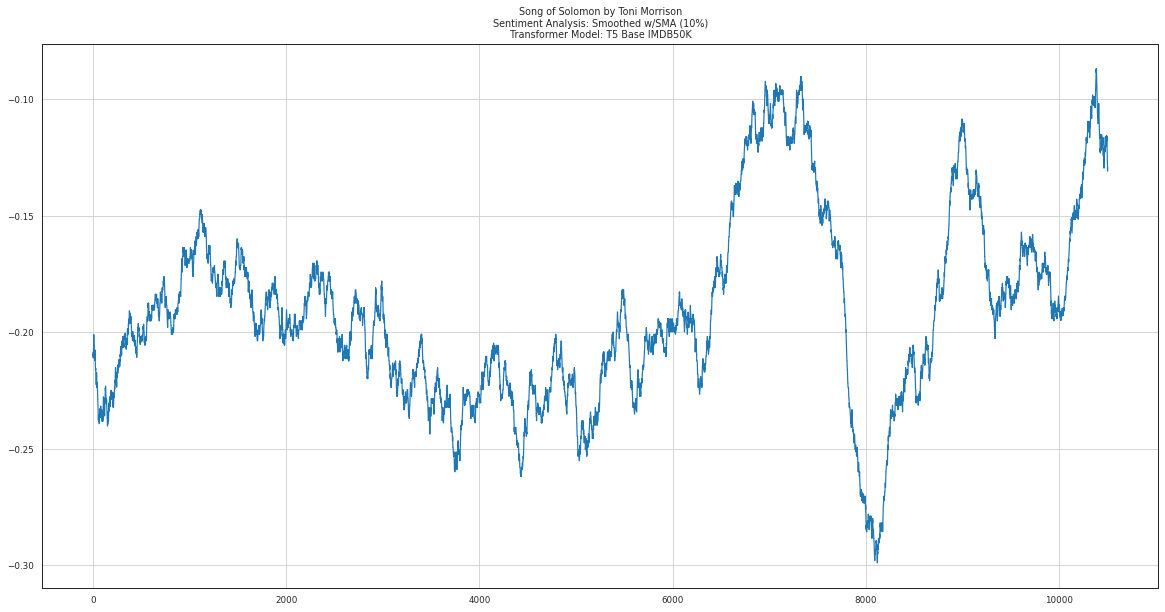

In [ ]:
# Verify Plausiblity of new Sentiment Values by Plotting

novel_indx = 0
corpus_text_str = corpus_texts_ls[novel_indx]
# amodel_str = 'huggingface' 
win_aper = 10

win_per = int((win_aper/100.)*global_vars.corpus_texts_dt[corpus_text_str][model_name].shape[0])
text_title_str = f"{global_vars.corpus_titles_dt[corpus_text_str][0]}\nSentiment Analysis: Smoothed w/SMA ({win_aper}%)\n{model_type} Model: {model_title}"
global_vars.corpus_texts_dt[corpus_text_str][model_name].rolling(win_per, center=True, min_periods=0).mean().plot(title=text_title_str)
plt.grid(True)
plt.show();

In [ ]:
global_vars.corpus_texts_dt[corpus_text_str].head()

text_raw  \
0  The North Carolina Mutual Life Insurance agent promised to fly from Mercy to the other side of L...   
1  Two days before the event was to take place he tacked a note on the door of his little yellow ho...   
2  At 3:00 p.m. on Wednesday the 18th of February, 1931, I will take off from Mercy and fly away on...   
3                                                                                   Please forgive me.   
4                                                                                     I loved you all.   

                                                                                            text_clean  \
0  the north carolina mutual life insurance agent promise to fly from mercy to the other side of la...   
1      two day before the event be to take place he tack a note on the door of his little yellow house   
2     at p be on wednesday the 18th of february i will take off from mercy and fly away on my own wing   
3                                                                                    please forgive me   
4                                                                                       i love you all   

   yelp  hinglish  imdb2way  t5imdb50k  
0     0         0         1          1  
1     0         0         1         -1  
2     4         0         1          1  
3     1         0         1          0  
4     4         2         1          1

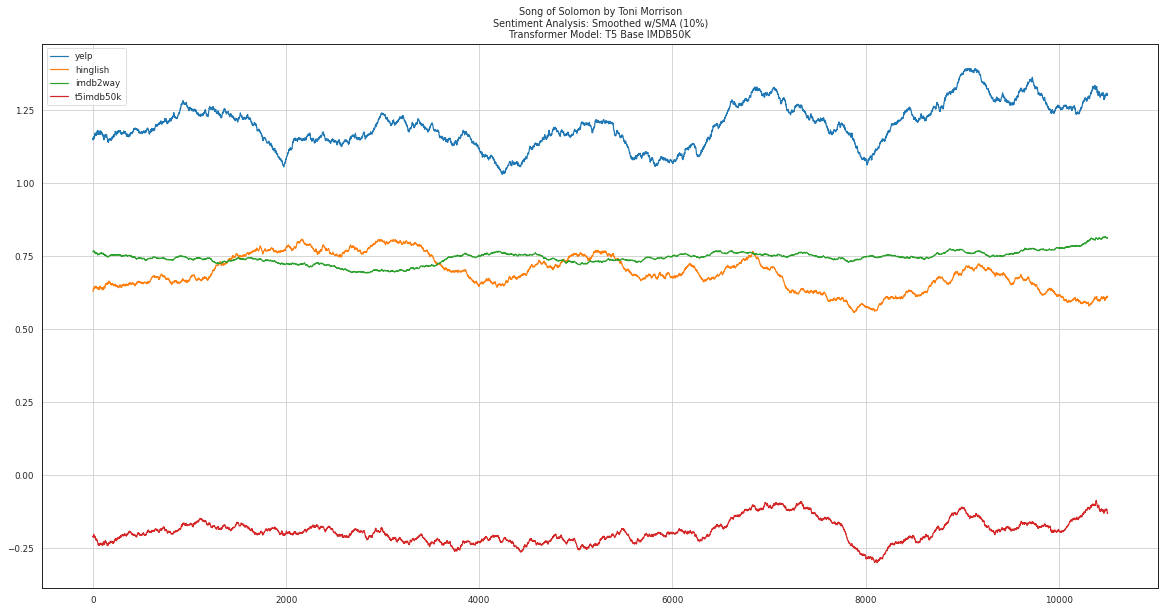

In [ ]:
# Plot all models

novel_indx = 0
corpus_text_str = corpus_texts_ls[novel_indx]
win_aper = 10

models_all_ls = list(global_vars.corpus_texts_dt[corpus_text_str].select_dtypes(include=[np.float,np.int]).columns)

win_per = int((win_aper/100.)*global_vars.corpus_texts_dt[corpus_text_str][model_name].shape[0])
text_title_str = f"{global_vars.corpus_titles_dt[corpus_text_str][0]}\nSentiment Analysis: Smoothed w/SMA ({win_aper}%)\n{model_type} Model: {model_title}"
global_vars.corpus_texts_dt[corpus_text_str][models_all_ls].rolling(win_per, center=True, min_periods=0).mean().plot(title=text_title_str)
plt.grid(True)
plt.show();

### **Save Checkpoint**

In [ ]:
# Verify in SentimentArcs Root Directory
os.chdir(Path_to_SentimentArcs)

print('Currently in SentimentArcs root directory:')
!pwd

print(f'Saving Text_Type: {Corpus_Genre}')
print(f'     Corpus_Type: {Corpus_Type}')

# Verify Subdir to save Cleaned Texts and Texts into..

print(f'\nThese Text Titles:\n')
global_vars.corpus_texts_dt.keys()

print(f'\nTo This Subdirectory:\n')
PATH_SENTIMENT_RAW


# Save sentiment values to subdir_sentiments

# os.chdir(Path_to_SentimentArcs)

if Corpus_Type == 'new':
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_corpus{Corpus_Number}_transformer_t5base50k.json'
else:
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_reference_transformer_t5base50k.json'

write_dict_dfs(global_vars.corpus_texts_dt, out_file=save_filename, out_dir=f'{PATH_SENTIMENT_RAW}')



Currently in SentimentArcs root directory:
/gdrive/MyDrive/sentimentarcs_notebooks
Saving Text_Type: novels
     Corpus_Type: new

These Text Titles:



dict_keys(['tmorrison_songofsolomon', 'cliu_threebodyproblem', 'sking_doctorsleep'])


To This Subdirectory:



'./sentiment_raw/sentiment_raw_novels_new_corpus2/'

Saving file to: ./sentiment_raw/sentiment_raw_novels_new_corpus2/sentiment_raw_novels_new_corpus2_transformer_t5base50k.json


In [ ]:
# Verify json file created

!ls -altr $PATH_SENTIMENT_RAW

total 79803
-rw------- 1 root root        0 Apr 10 17:52  test.txt
-rw------- 1 root root  8483161 Apr 12 13:55  all_novels_new_huggingface.json
-rw------- 1 root root  8483161 Apr 12 15:13 'Copy of sentiment_raw_novels_new_corpus2_transformer_huggingface.json'
-rw------- 1 root root 10018151 Apr 12 15:50  sentiment_raw_novels_new_corpus2_transformer_huggingface.json
-rw------- 1 root root  9989234 Apr 12 16:42  sentiment_raw_novels_new_corpus2_transformer_nlptown.json
-rw------- 1 root root  8483026 Apr 13 03:29  sentiment_raw_novels_new_corpus2_transformer_roberta.json
-rw------- 1 root root  7619669 Apr 13 04:04  sentiment_raw_novels_new_corpus2_transformer_yelp.json
-rw------- 1 root root  8573903 Apr 13 04:38  sentiment_raw_novels_new_corpus2_transformer_hinglish.json
-rw------- 1 root root  9528137 Apr 13 04:55  sentiment_raw_novels_new_corpus2_transformer_imdb2way.json
-rw------- 1 root root 10537752 Apr 13 05:13  sentiment_raw_novels_new_corpus2_transformer_t5base50k.json


## **RoBERTa XLM Twitter 8 Multilingual (3 cats)**

In [ ]:
# RoBERTa XLM Fine-tuend on 8 Multilingual Tweets

# Reset Global Dictionary
global_vars.corpus_texts_dt = {}

model_path = "cardiffnlp/twitter-xlm-roberta-base-sentiment"

sa_model = None
del sa_model
sa_model = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)

# Test
sa_model("T'estimo!")

Downloading:   0%|          | 0.00/841 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.83M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

[{'label': 'Positive', 'score': 0.6600582599639893}]

In [ ]:
global_vars.TEST_WORDS_LS

['Love',
 'Hate',
 'bizarre',
 'strange',
 'furious',
 'elated',
 'curious',
 'beserk',
 'gambaro']

In [ ]:
# from transformers.utils.dummy_pt_objects import SQUEEZEBERT_PRETRAINED_MODEL_ARCHIVE_LIST

# Define Model and Test

model_title = 'RoBERTa XLM Twitter 8Lang'
model_name = 'robertaxml8lang'
model_type = 'Transformer'

# Test Words
print(f'Testing WORD Sentiment')
print('--------------------------------------------------')
for i, aword_str in enumerate(global_vars.TEST_WORDS_LS):

  # word_sentiment_fl = SQUEEZEBERT_PRETRAINED_MODEL_ARCHIVE_LIST(aword_str)
  word_sentiment_fl = sa_model(aword_str)
  print(f'Word: {aword_str}\n    {word_sentiment_fl}\n')

# Test Sentences
print(f'\nTesting SENTENCE Sentiment')
print('--------------------------------------------------')
for i, asent_str in enumerate(global_vars.TEST_SENTENCES_LS):

  # sent_sentiment_fl = labelscore2fl(sa_model(asent_str), sa_model='robertaxml8lang')
  sent_sentiment_fl = labelscore2fl(sa_model(asent_str), sa_model='robertaxml8lang')
  print(f'Sentence: {asent_str}\n    {sent_sentiment_fl:.3f}\n')

Testing WORD Sentiment
--------------------------------------------------
Word: Love
    [{'label': 'Positive', 'score': 0.39642244577407837}]

Word: Hate
    [{'label': 'Negative', 'score': 0.5858045816421509}]

Word: bizarre
    [{'label': 'Negative', 'score': 0.4368371367454529}]

Word: strange
    [{'label': 'Negative', 'score': 0.3701768219470978}]

Word: furious
    [{'label': 'Negative', 'score': 0.42496591806411743}]

Word: elated
    [{'label': 'Neutral', 'score': 0.38555991649627686}]

Word: curious
    [{'label': 'Neutral', 'score': 0.49868252873420715}]

Word: beserk
    [{'label': 'Negative', 'score': 0.36750832200050354}]

Word: gambaro
    [{'label': 'Neutral', 'score': 0.3720065653324127}]


Testing SENTENCE Sentiment
--------------------------------------------------
Sentence: I hate bad evil worthless Mondays.
    -0.955

Sentence: I love Paris in the springtime
    0.846

Sentence: It was Wednesday.
    0.000

Sentence: You are a disgusting pig - I hate you.
    -0.9

In [ ]:
# Verify saving results to correct model name

print(f'Saving results to Model: {model_name}')

Saving results to Model: robertaxml8lang


In [ ]:
%%time

# NOTE:   9m05s @16:40 on 20220301 Colab Pro P100 (1 Novel: cmieville_thecityandthecity)
#         ~8m07s @16:49 on 20220201 Colab Pro P100 (1 Novel: scollins_thehungergames1)

#          30m36s @18:33 on 20220412 Colab Pro T4 (2 Novels: 1M, 1.1M)

#          28m29s @01:16 on 20220413 Colab Pro P100 (3 Novels, 1.2M, 1.3M, 1.7M)


for i, atext in enumerate(global_vars.corpus_texts_dt.keys()):
  models_ls = global_vars.corpus_texts_dt[atext].columns
  print(f"Processing #{i}: {atext}")
  if (Force_Recompute == True) or (model_name not in models_ls):
    global_vars.corpus_texts_dt[atext][model_name] = global_vars.corpus_texts_dt[atext]['text_clean'].apply(lambda x: labelscore2fl(sa_model(x), sa_model='robertaxml8lang'))
    print(f'  [{model_name}] Sentiment Recomputed and Value Updated')
  else:
    print(f'  [{model_name}] Already in DataFrame and no Forced Recompute, so no update made')

Processing #0: tmorrison_songofsolomon
  [robertaxml8lang] Sentiment Recomputed and Value Updated
Processing #1: cliu_threebodyproblem
  [robertaxml8lang] Sentiment Recomputed and Value Updated
Processing #2: sking_doctorsleep
  [robertaxml8lang] Sentiment Recomputed and Value Updated
CPU times: user 56min 49s, sys: 14.6 s, total: 57min 4s
Wall time: 28min 29s


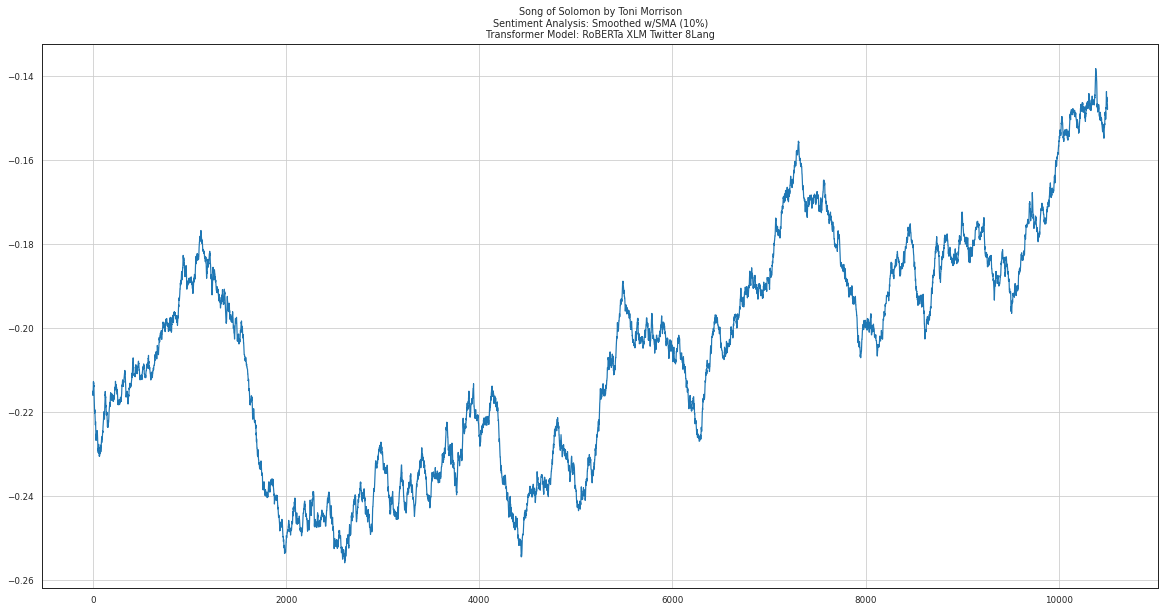

In [ ]:
# Verify Plausiblity of new Sentiment Values by Plotting

novel_indx = 0
corpus_text_str = corpus_texts_ls[novel_indx] 
win_aper = 10

win_per = int((win_aper/100.)*global_vars.corpus_texts_dt[corpus_text_str][model_name].shape[0])
text_title_str = f"{global_vars.corpus_titles_dt[corpus_text_str][0]}\nSentiment Analysis: Smoothed w/SMA ({win_aper}%)\n{model_type} Model: {model_title}"
global_vars.corpus_texts_dt[corpus_text_str][model_name].rolling(win_per, center=True, min_periods=0).mean().plot(title=text_title_str)
plt.grid(True)
plt.show();

In [ ]:
global_vars.corpus_texts_dt[corpus_text_str].head()

text_raw  \
0  The North Carolina Mutual Life Insurance agent promised to fly from Mercy to the other side of L...   
1  Two days before the event was to take place he tacked a note on the door of his little yellow ho...   
2  At 3:00 p.m. on Wednesday the 18th of February, 1931, I will take off from Mercy and fly away on...   
3                                                                                   Please forgive me.   
4                                                                                     I loved you all.   

                                                                                            text_clean  \
0  the north carolina mutual life insurance agent promise to fly from mercy to the other side of la...   
1      two day before the event be to take place he tack a note on the door of his little yellow house   
2     at p be on wednesday the 18th of february i will take off from mercy and fly away on my own wing   
3                                                                                    please forgive me   
4                                                                                       i love you all   

   yelp  hinglish  imdb2way  t5imdb50k  robertaxml8lang  
0     0         0         1          1         0.000000  
1     0         0         1         -1         0.000000  
2     4         0         1          1         0.000000  
3     1         0         1          0        -0.834827  
4     4         2         1          1         0.815599

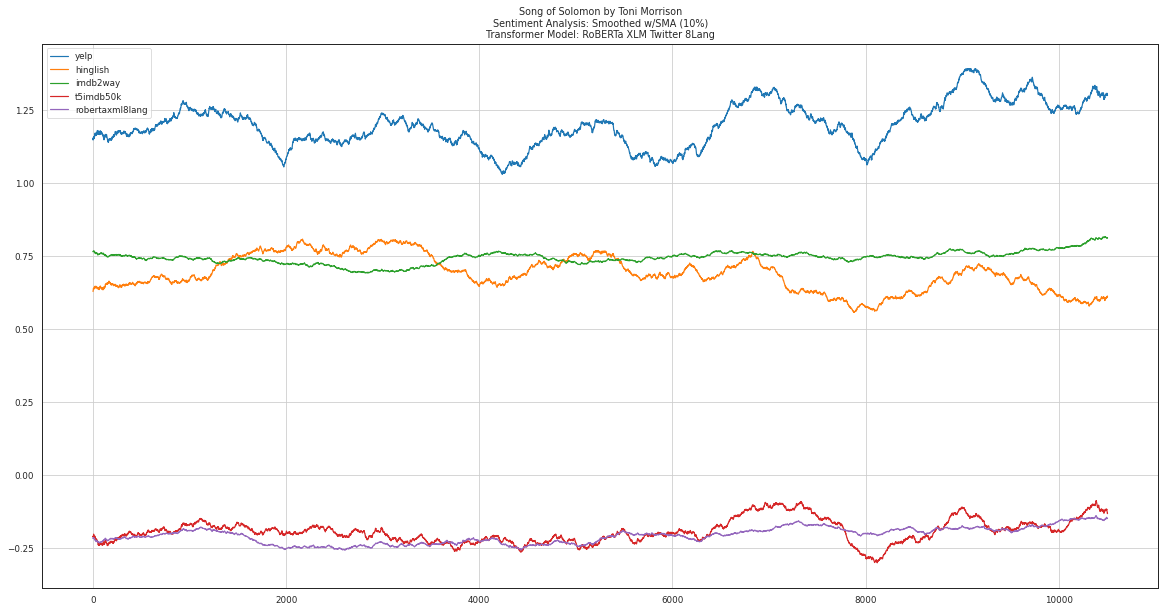

In [ ]:
# Plot all models

novel_indx = 0
corpus_text_str = corpus_texts_ls[novel_indx]
win_aper = 10

models_all_ls = list(global_vars.corpus_texts_dt[corpus_text_str].select_dtypes(include=[np.float,np.int]).columns)

win_per = int((win_aper/100.)*global_vars.corpus_texts_dt[corpus_text_str][model_name].shape[0])
text_title_str = f"{global_vars.corpus_titles_dt[corpus_text_str][0]}\nSentiment Analysis: Smoothed w/SMA ({win_aper}%)\n{model_type} Model: {model_title}"
global_vars.corpus_texts_dt[corpus_text_str][models_all_ls].rolling(win_per, center=True, min_periods=0).mean().plot(title=text_title_str)
plt.grid(True)
plt.show();

### **Save Checkpoint**

In [ ]:
# Verify in SentimentArcs Root Directory
os.chdir(Path_to_SentimentArcs)

print('Currently in SentimentArcs root directory:')
!pwd

print(f'Saving Text_Type: {Corpus_Genre}')
print(f'     Corpus_Type: {Corpus_Type}')

# Verify Subdir to save Cleaned Texts and Texts into..

print(f'\nThese Text Titles:\n')
global_vars.corpus_texts_dt.keys()

print(f'\nTo This Subdirectory:\n')
PATH_SENTIMENT_RAW


# Save sentiment values to subdir_sentiments

# os.chdir(Path_to_SentimentArcs)

if Corpus_Type == 'new':
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_corpus{Corpus_Number}_transformer_robertaxml8lang.json'
else:
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_reference_transformer_robertaxml8lang.json'

write_dict_dfs(global_vars.corpus_texts_dt, out_file=save_filename, out_dir=f'{PATH_SENTIMENT_RAW}')



Currently in SentimentArcs root directory:
/gdrive/MyDrive/sentimentarcs_notebooks
Saving Text_Type: novels
     Corpus_Type: new

These Text Titles:



dict_keys(['tmorrison_songofsolomon', 'cliu_threebodyproblem', 'sking_doctorsleep'])


To This Subdirectory:



'./sentiment_raw/sentiment_raw_novels_new_corpus2/'

Saving file to: ./sentiment_raw/sentiment_raw_novels_new_corpus2/sentiment_raw_novels_new_corpus2_transformer_robertaxml8lang.json


In [ ]:
# Verify json file created

!ls -altr $PATH_SENTIMENT_RAW

total 91584
-rw------- 1 root root        0 Apr 10 17:52  test.txt
-rw------- 1 root root  8483161 Apr 12 13:55  all_novels_new_huggingface.json
-rw------- 1 root root  8483161 Apr 12 15:13 'Copy of sentiment_raw_novels_new_corpus2_transformer_huggingface.json'
-rw------- 1 root root 10018151 Apr 12 15:50  sentiment_raw_novels_new_corpus2_transformer_huggingface.json
-rw------- 1 root root  9989234 Apr 12 16:42  sentiment_raw_novels_new_corpus2_transformer_nlptown.json
-rw------- 1 root root  8483026 Apr 13 03:29  sentiment_raw_novels_new_corpus2_transformer_roberta.json
-rw------- 1 root root  7619669 Apr 13 04:04  sentiment_raw_novels_new_corpus2_transformer_yelp.json
-rw------- 1 root root  8573903 Apr 13 04:38  sentiment_raw_novels_new_corpus2_transformer_hinglish.json
-rw------- 1 root root  9528137 Apr 13 04:55  sentiment_raw_novels_new_corpus2_transformer_imdb2way.json
-rw------- 1 root root 10537752 Apr 13 05:13  sentiment_raw_novels_new_corpus2_transformer_t5base50k.json
-rw--

## **FinBERT Tone (3 cats)**

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification

In [ ]:
# FinBERT Tone

# Reset Global Dictionary
global_vars.corpus_texts_dt = {}

finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone',num_labels=3)
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')

sa_model = pipeline("sentiment-analysis", model=finbert, tokenizer=tokenizer)

Downloading:   0%|          | 0.00/533 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/419M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/221k [00:00<?, ?B/s]

In [ ]:
# Test

fin_sentences_ls = ["there is a shortage of capital, and we need extra financing",  
             "growth is strong and we have plenty of liquidity", 
             "there are doubts about our finances", 
             "profits are flat"]
results_ls = sa_model(fin_sentences_ls)
print(results_ls)

[{'label': 'negative', 'score': 0.9966173768043518}, {'label': 'positive', 'score': 1.0}, {'label': 'negative', 'score': 0.9999710321426392}, {'label': 'neutral', 'score': 0.9889442920684814}]


In [ ]:
# Test

fin_sentences_ls = ["I love sunny days and happy puppy dogs.",
                    "The market crashed and all indicators were down",
                    "Strong institutional buying resulted in rising share prices and a bull market"]
                  
results_ls = sa_model(fin_sentences_ls)

def dtlabelscore2fl(adict):
  """
  Given a dictionary of 2 keys ['label']=[positive|negative|neutral] and ['score']=[0.0 to +1.0]
  Return an adjusted sentiment score [-1.0 to +1.0]
  """
  adj_sentiment = 0.
  apolarity = adict['label']
  asentiment = adict['score']
  if apolarity == 'negative':
    adj_sentiment = -1. * float(asentiment)
  elif apolarity == 'positive':
    adj_sentiment = float(asentiment)
  else:
    adj_sentiment = 0.

  return adj_sentiment

for i, asent_dt in enumerate(results_ls):
  asentence = fin_sentences_ls[i]
  raw_results = results_ls[i]
  adj_senti = dtlabelscore2fl(asent_dt)
  # print(f'SENTENCE:\n    {asentence}\n    apolarity: {apolarity}\n    asentiment: {asentiment}\n    adj_sentiment: {adj_sentiment}') 
  print(f'SENTENCE:\n    {asentence}\n    raw_results: {raw_results}\n    adj_sentiment: {adj_senti}')


SENTENCE:
    I love sunny days and happy puppy dogs.
    raw_results: {'label': 'neutral', 'score': 0.9958643913269043}
    adj_sentiment: 0.0
SENTENCE:
    The market crashed and all indicators were down
    raw_results: {'label': 'negative', 'score': 0.9999221563339233}
    adj_sentiment: -0.9999221563339233
SENTENCE:
    Strong institutional buying resulted in rising share prices and a bull market
    raw_results: {'label': 'positive', 'score': 1.0}
    adj_sentiment: 1.0


In [ ]:
# Define Model and Test

model_title = 'FinBERT Tone'
model_name = 'finberttone'
model_type = 'Transformer'

# Test Emoji
emoji_str = "We are very happy to show you the ðŸ¤— Transformers library."
raw_sentiment = sa_model(emoji_str)[0]
adj_sentiment = dtlabelscore2fl(raw_sentiment)
print(f'Emoji String: {emoji_str}\n    Raw Sentiment: {raw_sentiment}\n    Adj Sentiment: {adj_sentiment}\n')
print('\n\n')

# Test Words
print(f'Testing WORD Sentiment')
print('--------------------------------------------------')
for i, aword_str in enumerate(global_vars.TEST_WORDS_LS):

  raw_sentiment = sa_model(aword_str)[0]
  adj_sentiment = dtlabelscore2fl(raw_sentiment)
  print(f'Word String: {aword_str}\n    Raw Sentiment: {raw_sentiment}\n    Adj Sentiment: {adj_sentiment}\n')
  # print('\n\n')
  # print(f'Word: {aword_str}\n    Raw Sentiment: {adj_sentiment} out of {sentiment_scale} (prob={sentiment_prob:.3f})\n')

# Test Sentences
print(f'\nTesting SENTENCE Sentiment')
print('--------------------------------------------------')
for i, asent_str in enumerate(global_vars.TEST_SENTENCES_LS):

  raw_sentiment = sa_model(asent_str)[0]
  adj_sentiment = dtlabelscore2fl(raw_sentiment)
  print(f'Sentence String: {asent_str}\n    Raw Sentiment: {raw_sentiment}\n    Adj Sentiment: {adj_sentiment}\n')
  # print(f'Sentence: {asent_str}\n    Sentiment: {sentiment_val} out of {sentiment_scale} (prob={sentiment_prob:.3f})\n')


Emoji String: We are very happy to show you the ðŸ¤— Transformers library.
    Raw Sentiment: {'label': 'positive', 'score': 0.9999575614929199}
    Adj Sentiment: 0.9999575614929199




Testing WORD Sentiment
--------------------------------------------------
Word String: Love
    Raw Sentiment: {'label': 'neutral', 'score': 0.9546787142753601}
    Adj Sentiment: 0.0

Word String: Hate
    Raw Sentiment: {'label': 'neutral', 'score': 0.9850627183914185}
    Adj Sentiment: 0.0

Word String: bizarre
    Raw Sentiment: {'label': 'neutral', 'score': 0.9916641712188721}
    Adj Sentiment: 0.0

Word String: strange
    Raw Sentiment: {'label': 'neutral', 'score': 0.9986492991447449}
    Adj Sentiment: 0.0

Word String: furious
    Raw Sentiment: {'label': 'neutral', 'score': 0.8644618988037109}
    Adj Sentiment: 0.0

Word String: elated
    Raw Sentiment: {'label': 'neutral', 'score': 0.9996832609176636}
    Adj Sentiment: 0.0

Word String: curious
    Raw Sentiment: {'label': 'neutral', '

In [ ]:
# Verify saving results to correct model name

print(f'Saving results to Model: {model_name}')

Saving results to Model: finberttone


In [ ]:
global_vars.corpus_texts_dt[atext].columns

Index(['text_raw', 'text_clean', 'yelp', 'hinglish', 'imdb2way', 't5imdb50k',
       'robertaxml8lang'],
      dtype='object')

In [ ]:
corpus_texts_ls

['tmorrison_songofsolomon', 'cliu_threebodyproblem', 'sking_doctorsleep']

In [ ]:
global_vars.corpus_texts_dt.keys()

dict_keys(['tmorrison_songofsolomon', 'cliu_threebodyproblem', 'sking_doctorsleep'])

In [ ]:
%%time

# NOTE:    16m22s @21:56 on 20220301 Colab Pro T4 (2 Novels: 1M, 1.1M)

#          28m01s @01:48 on 20220413 Colab Pro P100 (3 Novels, 1.2M, 1.3M, 1.7M)



for i, atext in enumerate(global_vars.corpus_texts_dt.keys()):
  models_ls = global_vars.corpus_texts_dt[atext].columns
  print(f"Processing #{i}: {atext}")
  if (Force_Recompute == True) or (model_name not in models_ls):
    # corpus_texts_dt[atext][model_name] = corpus_texts_dt[atext]['text_clean'].apply(lambda x: logitstensor2sentiment(sa_yelp(**tokenizer(x, return_tensors='pt')))[0])
    global_vars.corpus_texts_dt[atext][model_name] = global_vars.corpus_texts_dt[atext]['text_clean'].apply(lambda x: dtlabelscore2fl(sa_model(x)[0]))
    print(f'  [{model_name}] Sentiment Recomputed and Value Updated')
  else:
    print(f'  [{model_name}] Already in DataFrame and no Forced Recompute, so no update made')


Processing #0: tmorrison_songofsolomon
  [finberttone] Sentiment Recomputed and Value Updated
Processing #1: cliu_threebodyproblem
  [finberttone] Sentiment Recomputed and Value Updated
Processing #2: sking_doctorsleep
  [finberttone] Sentiment Recomputed and Value Updated
CPU times: user 55min 54s, sys: 13.2 s, total: 56min 7s
Wall time: 28min 1s


In [ ]:
global_vars.corpus_texts_dt.keys()

dict_keys(['tmorrison_songofsolomon', 'cliu_threebodyproblem', 'sking_doctorsleep'])

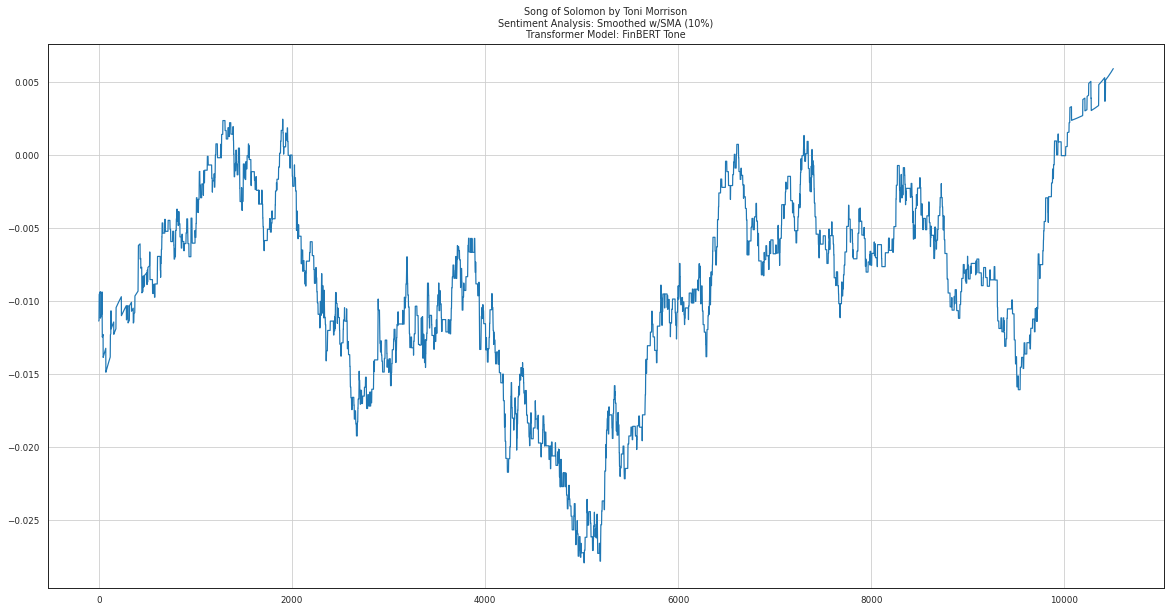

In [ ]:
# Verify Plausiblity of new Sentiment Values by Plotting

novel_indx = 0
corpus_text_str = corpus_texts_ls[novel_indx]
# amodel_str = 'huggingface' 
win_aper = 10

win_per = int((win_aper/100.)*global_vars.corpus_texts_dt[corpus_text_str][model_name].shape[0])
text_title_str = f"{global_vars.corpus_titles_dt[corpus_text_str][0]}\nSentiment Analysis: Smoothed w/SMA ({win_aper}%)\n{model_type} Model: {model_title}"
global_vars.corpus_texts_dt[corpus_text_str][model_name].rolling(win_per, center=True, min_periods=0).mean().plot(title=text_title_str)
plt.grid(True)
plt.show();

In [ ]:
global_vars.corpus_texts_dt[corpus_text_str].head()

text_raw  \
0  The North Carolina Mutual Life Insurance agent promised to fly from Mercy to the other side of L...   
1  Two days before the event was to take place he tacked a note on the door of his little yellow ho...   
2  At 3:00 p.m. on Wednesday the 18th of February, 1931, I will take off from Mercy and fly away on...   
3                                                                                   Please forgive me.   
4                                                                                     I loved you all.   

                                                                                            text_clean  \
0  the north carolina mutual life insurance agent promise to fly from mercy to the other side of la...   
1      two day before the event be to take place he tack a note on the door of his little yellow house   
2     at p be on wednesday the 18th of february i will take off from mercy and fly away on my own wing   
3                                                                                    please forgive me   
4                                                                                       i love you all   

   yelp  hinglish  imdb2way  t5imdb50k  robertaxml8lang  finberttone  
0     0         0         1          1         0.000000     0.000000  
1     0         0         1         -1         0.000000     0.000000  
2     4         0         1          1         0.000000     0.000000  
3     1         0         1          0        -0.834827     0.000000  
4     4         2         1          1         0.815599     0.987671

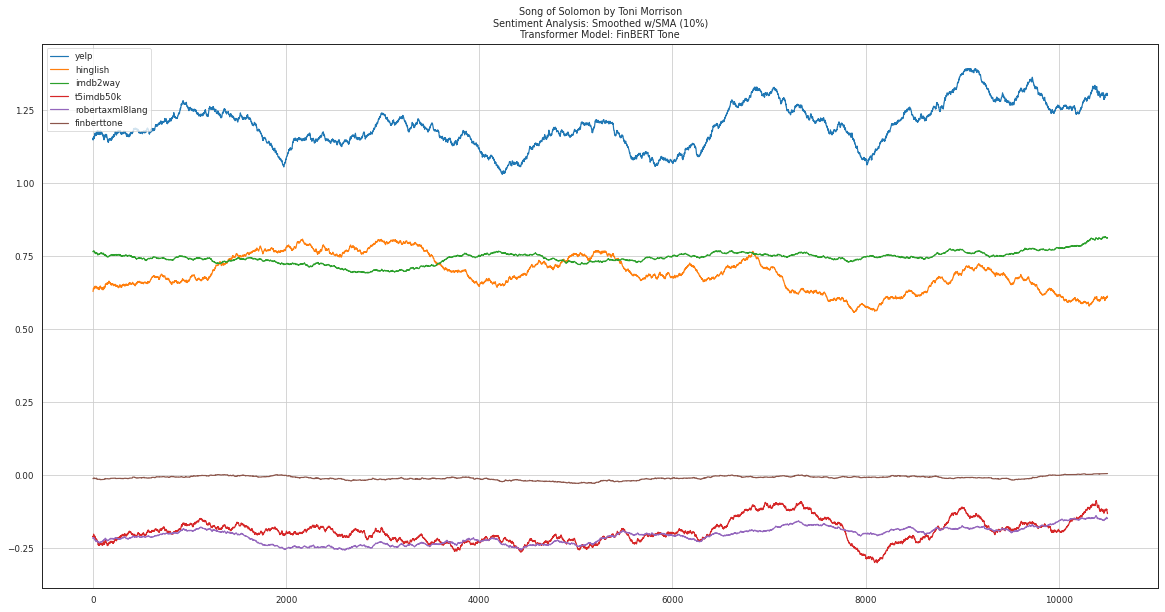

In [ ]:
# Plot all models

novel_indx = 0
corpus_text_str = corpus_texts_ls[novel_indx]
win_aper = 10

models_all_ls = list(global_vars.corpus_texts_dt[corpus_text_str].select_dtypes(include=[np.float,np.int]).columns)

win_per = int((win_aper/100.)*global_vars.corpus_texts_dt[corpus_text_str][model_name].shape[0])
text_title_str = f"{global_vars.corpus_titles_dt[corpus_text_str][0]}\nSentiment Analysis: Smoothed w/SMA ({win_aper}%)\n{model_type} Model: {model_title}"
global_vars.corpus_texts_dt[corpus_text_str][models_all_ls].rolling(win_per, center=True, min_periods=0).mean().plot(title=text_title_str)
plt.grid(True)
plt.show();

### **Save Checkpoint**

In [ ]:
# Verify in SentimentArcs Root Directory
os.chdir(Path_to_SentimentArcs)

print('Currently in SentimentArcs root directory:')
!pwd

print(f'Saving Text_Type: {Corpus_Genre}')
print(f'     Corpus_Type: {Corpus_Type}')

# Verify Subdir to save Cleaned Texts and Texts into..

print(f'\nThese Text Titles:\n')
global_vars.corpus_texts_dt.keys()

print(f'\nTo This Subdirectory:\n')
PATH_SENTIMENT_RAW


# Save sentiment values to subdir_sentiments

# os.chdir(Path_to_SentimentArcs)

if Corpus_Type == 'new':
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_corpus{Corpus_Number}_transformer_finberttone.json'
else:
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_reference_transformer_finberttone.json'

write_dict_dfs(global_vars.corpus_texts_dt, out_file=save_filename, out_dir=f'{PATH_SENTIMENT_RAW}')



Currently in SentimentArcs root directory:
/gdrive/MyDrive/sentimentarcs_notebooks
Saving Text_Type: novels
     Corpus_Type: new

These Text Titles:



dict_keys(['tmorrison_songofsolomon', 'cliu_threebodyproblem', 'sking_doctorsleep'])


To This Subdirectory:



'./sentiment_raw/sentiment_raw_novels_new_corpus2/'

Saving file to: ./sentiment_raw/sentiment_raw_novels_new_corpus2/sentiment_raw_novels_new_corpus2_transformer_finberttone.json


In [ ]:
# Verify json file created

!ls -altr $PATH_SENTIMENT_RAW

total 104513
-rw------- 1 root root        0 Apr 10 17:52  test.txt
-rw------- 1 root root  8483161 Apr 12 13:55  all_novels_new_huggingface.json
-rw------- 1 root root  8483161 Apr 12 15:13 'Copy of sentiment_raw_novels_new_corpus2_transformer_huggingface.json'
-rw------- 1 root root 10018151 Apr 12 15:50  sentiment_raw_novels_new_corpus2_transformer_huggingface.json
-rw------- 1 root root  9989234 Apr 12 16:42  sentiment_raw_novels_new_corpus2_transformer_nlptown.json
-rw------- 1 root root  8483026 Apr 13 03:29  sentiment_raw_novels_new_corpus2_transformer_roberta.json
-rw------- 1 root root  7619669 Apr 13 04:04  sentiment_raw_novels_new_corpus2_transformer_yelp.json
-rw------- 1 root root  8573903 Apr 13 04:38  sentiment_raw_novels_new_corpus2_transformer_hinglish.json
-rw------- 1 root root  9528137 Apr 13 04:55  sentiment_raw_novels_new_corpus2_transformer_imdb2way.json
-rw------- 1 root root 10537752 Apr 13 05:13  sentiment_raw_novels_new_corpus2_transformer_t5base50k.json
-rw-

## **DistilRoBERTa Financial News (3 cats)**

In [ ]:
from transformers import BertTokenizer

In [ ]:
# distilbertfinnews

# Reset Global Dictionary
global_vars.corpus_texts_dt = {}

distilrobertfinnews = AutoModelForSequenceClassification.from_pretrained("mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')

sa_model = None
del sa_model
sa_model = pipeline("sentiment-analysis", model=distilrobertfinnews, tokenizer=tokenizer)

Downloading:   0%|          | 0.00/221k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/533 [00:00<?, ?B/s]

In [ ]:
# Test

fin_sentences_ls = ["there is a shortage of capital, and we need extra financing",  
             "growth is strong and we have plenty of liquidity", 
             "there are doubts about our finances", 
             "profits are flat"]
results_ls = sa_model(fin_sentences_ls)
print(results_ls)

[{'label': 'neutral', 'score': 0.9998612403869629}, {'label': 'neutral', 'score': 0.9998562335968018}, {'label': 'neutral', 'score': 0.9998594522476196}, {'label': 'neutral', 'score': 0.9839770197868347}]


In [ ]:
# Test

fin_sentences_ls = ["I love sunny days and happy puppy dogs.",
                    "The market crashed and all indicators were down",
                    "Strong institutional buying resulted in rising share prices and a bull market"]
                  
results_ls = sa_model(fin_sentences_ls)

def dtlabelscore2fl(adict):
  """
  Given a dictionary of 2 keys ['label']=[positive|negative|neutral] and ['score']=[0.0 to +1.0]
  Return an adjusted sentiment score [-1.0 to +1.0]
  """
  adj_sentiment = 0.
  apolarity = adict['label']
  asentiment = adict['score']
  if apolarity == 'negative':
    adj_sentiment = -1. * float(asentiment)
  elif apolarity == 'positive':
    adj_sentiment = float(asentiment)
  else:
    adj_sentiment = 0.

  return adj_sentiment

for i, asent_dt in enumerate(results_ls):
  asentence = fin_sentences_ls[i]
  raw_results = results_ls[i]
  adj_senti = dtlabelscore2fl(asent_dt)
  # print(f'SENTENCE:\n    {asentence}\n    apolarity: {apolarity}\n    asentiment: {asentiment}\n    adj_sentiment: {adj_sentiment}') 
  print(f'SENTENCE:\n    {asentence}\n    raw_results: {raw_results}\n    adj_sentiment: {adj_senti}')


SENTENCE:
    I love sunny days and happy puppy dogs.
    raw_results: {'label': 'neutral', 'score': 0.9998555183410645}
    adj_sentiment: 0.0
SENTENCE:
    The market crashed and all indicators were down
    raw_results: {'label': 'positive', 'score': 0.9142057299613953}
    adj_sentiment: 0.9142057299613953
SENTENCE:
    Strong institutional buying resulted in rising share prices and a bull market
    raw_results: {'label': 'neutral', 'score': 0.978340208530426}
    adj_sentiment: 0.0


In [ ]:
# Define Model and Test

model_title = 'DistilBERT FinNews'
model_name = 'distilbertfinnews'
model_type = 'Transformer'

# Test Emoji
emoji_str = "We are very happy to show you the ðŸ¤— Transformers library."
raw_sentiment = sa_model(emoji_str)[0]
adj_sentiment = dtlabelscore2fl(raw_sentiment)
print(f'Emoji String: {emoji_str}\n    Raw Sentiment: {raw_sentiment}\n    Adj Sentiment: {adj_sentiment}\n')
print('\n\n')

# Test Words
print(f'Testing WORD Sentiment')
print('--------------------------------------------------')
for i, aword_str in enumerate(global_vars.TEST_WORDS_LS):

  raw_sentiment = sa_model(aword_str)[0]
  adj_sentiment = dtlabelscore2fl(raw_sentiment)
  print(f'Word String: {aword_str}\n    Raw Sentiment: {raw_sentiment}\n    Adj Sentiment: {adj_sentiment}\n')
  # print('\n\n')
  # print(f'Word: {aword_str}\n    Raw Sentiment: {adj_sentiment} out of {sentiment_scale} (prob={sentiment_prob:.3f})\n')

# Test Sentences
print(f'\nTesting SENTENCE Sentiment')
print('--------------------------------------------------')
for i, asent_str in enumerate(global_vars.TEST_SENTENCES_LS):

  raw_sentiment = sa_model(asent_str)[0]
  adj_sentiment = dtlabelscore2fl(raw_sentiment)
  print(f'Sentence String: {asent_str}\n    Raw Sentiment: {raw_sentiment}\n    Adj Sentiment: {adj_sentiment}\n')
  # print(f'Sentence: {asent_str}\n    Sentiment: {sentiment_val} out of {sentiment_scale} (prob={sentiment_prob:.3f})\n')


Emoji String: We are very happy to show you the ðŸ¤— Transformers library.
    Raw Sentiment: {'label': 'neutral', 'score': 0.9998525381088257}
    Adj Sentiment: 0.0




Testing WORD Sentiment
--------------------------------------------------
Word String: Love
    Raw Sentiment: {'label': 'neutral', 'score': 0.9997914433479309}
    Adj Sentiment: 0.0

Word String: Hate
    Raw Sentiment: {'label': 'neutral', 'score': 0.9995104074478149}
    Adj Sentiment: 0.0

Word String: bizarre
    Raw Sentiment: {'label': 'neutral', 'score': 0.9998428821563721}
    Adj Sentiment: 0.0

Word String: strange
    Raw Sentiment: {'label': 'neutral', 'score': 0.99965500831604}
    Adj Sentiment: 0.0

Word String: furious
    Raw Sentiment: {'label': 'neutral', 'score': 0.9998169541358948}
    Adj Sentiment: 0.0

Word String: elated
    Raw Sentiment: {'label': 'neutral', 'score': 0.9998276233673096}
    Adj Sentiment: 0.0

Word String: curious
    Raw Sentiment: {'label': 'neutral', 'score': 0.99981445

In [ ]:
# Verify saving results to correct model name

print(f'Saving results to Model: {model_name}')

Saving results to Model: distilbertfinnews


In [ ]:
global_vars.corpus_texts_dt[atext].columns

Index(['text_raw', 'text_clean'], dtype='object')

In [ ]:
corpus_texts_ls

['tmorrison_songofsolomon', 'cliu_threebodyproblem', 'sking_doctorsleep']

In [ ]:
global_vars.corpus_texts_dt.keys()

dict_keys(['tmorrison_songofsolomon', 'cliu_threebodyproblem', 'sking_doctorsleep'])

In [ ]:
%%time

# NOTE:    9m16s @21:56 on 20220301 Colab Pro T4 (2 Novels: 1M, 1.1M)


#         28m01s @02:17 on 20220413 Colab Pro P100 (3 Novels, 1.2M, 1.3M, 1.7M)


for i, atext in enumerate(global_vars.corpus_texts_dt.keys()):
  models_ls = global_vars.corpus_texts_dt[atext].columns
  print(f"Processing #{i}: {atext}")
  if (Force_Recompute == True) or (model_name not in models_ls):
    # corpus_texts_dt[atext][model_name] = corpus_texts_dt[atext]['text_clean'].apply(lambda x: logitstensor2sentiment(sa_yelp(**tokenizer(x, return_tensors='pt')))[0])
    global_vars.corpus_texts_dt[atext][model_name] = global_vars.corpus_texts_dt[atext]['text_clean'].apply(lambda x: dtlabelscore2fl(sa_model(x)[0]))
    print(f'  [{model_name}] Sentiment Recomputed and Value Updated')
  else:
    print(f'  [{model_name}] Already in DataFrame and no Forced Recompute, so no update made')


Processing #0: tmorrison_songofsolomon
  [distilbertfinnews] Sentiment Recomputed and Value Updated
Processing #1: cliu_threebodyproblem
  [distilbertfinnews] Sentiment Recomputed and Value Updated
Processing #2: sking_doctorsleep
  [distilbertfinnews] Sentiment Recomputed and Value Updated
CPU times: user 29min 53s, sys: 7.15 s, total: 30min
Wall time: 14min 58s


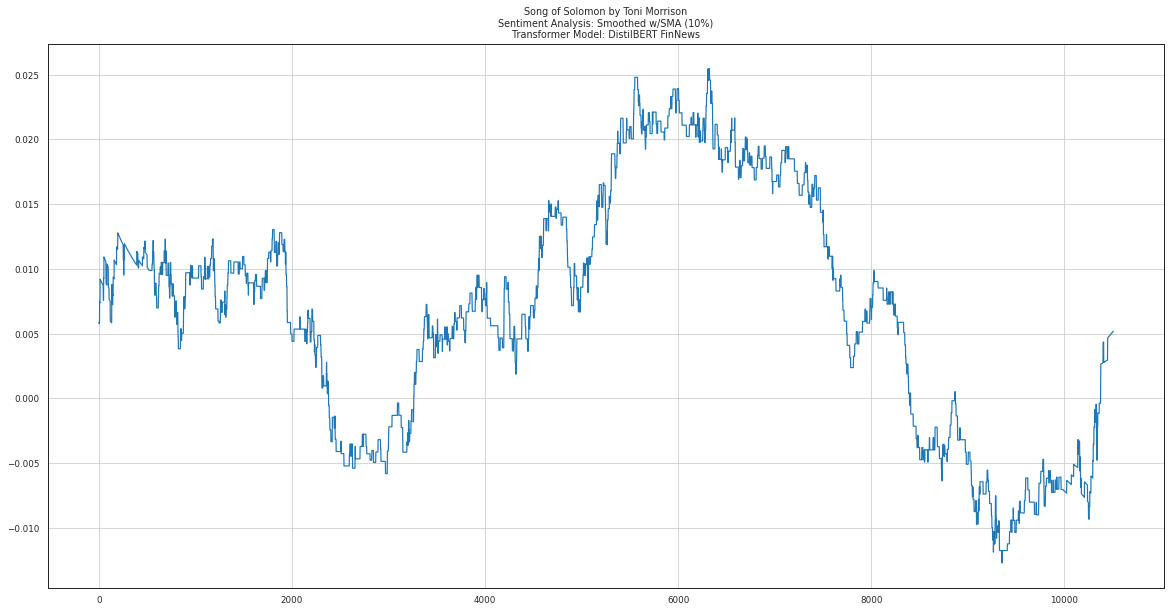

In [ ]:
# Verify Plausiblity of new Sentiment Values by Plotting

novel_indx = 0
corpus_text_str = corpus_texts_ls[novel_indx]
# amodel_str = 'huggingface' 
win_aper = 10

win_per = int((win_aper/100.)*global_vars.corpus_texts_dt[corpus_text_str][model_name].shape[0])
text_title_str = f"{global_vars.corpus_titles_dt[corpus_text_str][0]}\nSentiment Analysis: Smoothed w/SMA ({win_aper}%)\n{model_type} Model: {model_title}"
global_vars.corpus_texts_dt[corpus_text_str][model_name].rolling(win_per, center=True, min_periods=0).mean().plot(title=text_title_str)
plt.grid(True)
plt.show();

In [ ]:
global_vars.corpus_texts_dt[corpus_text_str].head()

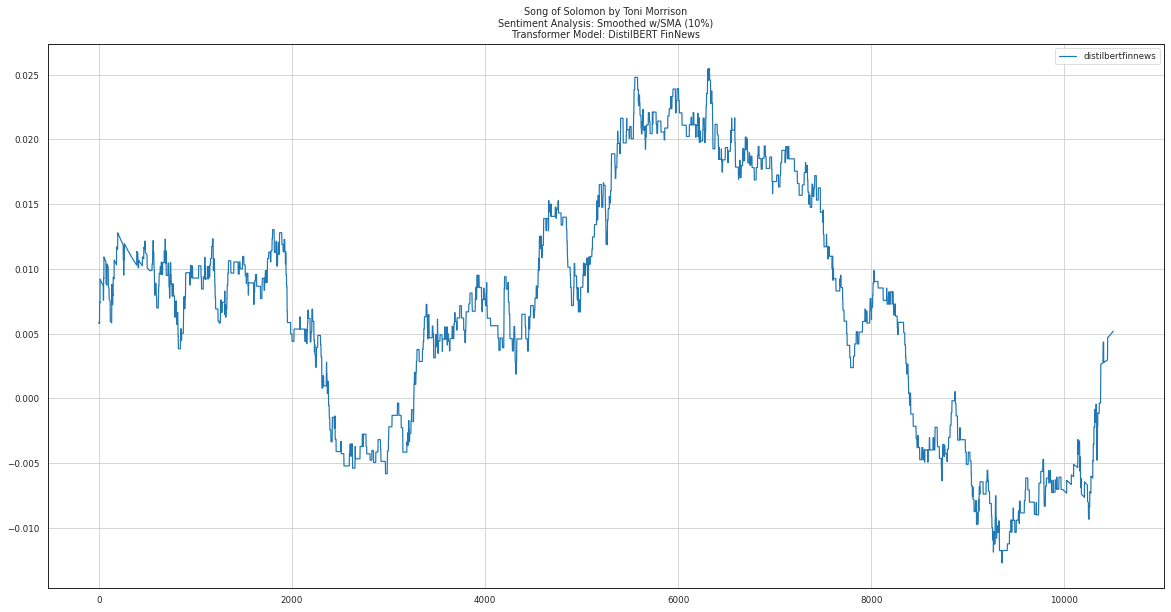

In [ ]:
# Plot all models

novel_indx = 0
corpus_text_str = corpus_texts_ls[novel_indx]
win_aper = 10

models_all_ls = list(global_vars.corpus_texts_dt[corpus_text_str].select_dtypes(include=[np.float,np.int]).columns)

win_per = int((win_aper/100.)*global_vars.corpus_texts_dt[corpus_text_str][model_name].shape[0])
text_title_str = f"{global_vars.corpus_titles_dt[corpus_text_str][0]}\nSentiment Analysis: Smoothed w/SMA ({win_aper}%)\n{model_type} Model: {model_title}"
global_vars.corpus_texts_dt[corpus_text_str][models_all_ls].rolling(win_per, center=True, min_periods=0).mean().plot(title=text_title_str)
plt.grid(True)
plt.show();

### **Save Checkpoint**

In [ ]:
# Verify in SentimentArcs Root Directory
os.chdir(Path_to_SentimentArcs)

print('Currently in SentimentArcs root directory:')
!pwd

print(f'Saving Text_Type: {Corpus_Genre}')
print(f'     Corpus_Type: {Corpus_Type}')

# Verify Subdir to save Cleaned Texts and Texts into..

print(f'\nThese Text Titles:\n')
global_vars.corpus_texts_dt.keys()

print(f'\nTo This Subdirectory:\n')
PATH_SENTIMENT_RAW


# Save sentiment values to subdir_sentiments

# os.chdir(Path_to_SentimentArcs)

if Corpus_Type == 'new':
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_corpus{Corpus_Number}_transformer_distilrobertafinnews.json'
else:
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_reference_transformer_distilrobertafinnews.json'

write_dict_dfs(global_vars.corpus_texts_dt, out_file=save_filename, out_dir=f'{PATH_SENTIMENT_RAW}')



Currently in SentimentArcs root directory:
/gdrive/MyDrive/sentimentarcs_notebooks
Saving Text_Type: novels
     Corpus_Type: new

These Text Titles:



dict_keys(['tmorrison_songofsolomon', 'cliu_threebodyproblem', 'sking_doctorsleep'])


To This Subdirectory:



'./sentiment_raw/sentiment_raw_novels_new_corpus2/'

Saving file to: ./sentiment_raw/sentiment_raw_novels_new_corpus2/sentiment_raw_novels_new_corpus2_transformer_distilrobertafinnews.json


In [ ]:
# Verify json file created

!ls -altr $PATH_SENTIMENT_RAW

total 120786
-rw------- 1 root root        0 Apr 10 17:52  test.txt
-rw------- 1 root root  8483161 Apr 12 13:55  all_novels_new_huggingface.json
-rw------- 1 root root  8483161 Apr 12 15:13 'Copy of sentiment_raw_novels_new_corpus2_transformer_huggingface.json'
-rw------- 1 root root 10018151 Apr 12 15:50  sentiment_raw_novels_new_corpus2_transformer_huggingface.json
-rw------- 1 root root  9989234 Apr 12 16:42  sentiment_raw_novels_new_corpus2_transformer_nlptown.json
-rw------- 1 root root  8483026 Apr 13 03:29  sentiment_raw_novels_new_corpus2_transformer_roberta.json
-rw------- 1 root root  7619669 Apr 13 04:04  sentiment_raw_novels_new_corpus2_transformer_yelp.json
-rw------- 1 root root  8573903 Apr 13 04:38  sentiment_raw_novels_new_corpus2_transformer_hinglish.json
-rw------- 1 root root  9528137 Apr 13 04:55  sentiment_raw_novels_new_corpus2_transformer_imdb2way.json
-rw------- 1 root root 10537752 Apr 13 05:13  sentiment_raw_novels_new_corpus2_transformer_t5base50k.json
-rw-

## **FinBERT (3 cats)**



In [ ]:
# ProsusAI FinBERT

# Reset Global Dictionary
global_vars.corpus_texts_dt = {}

finbert = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")

sa_model = None
del sa_model
sa_model = pipeline("sentiment-analysis", model=finbert, tokenizer=tokenizer)

Downloading:   0%|          | 0.00/758 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/418M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/252 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
# Test

fin_sentences_ls = ["there is a shortage of capital, and we need extra financing",  
             "growth is strong and we have plenty of liquidity", 
             "there are doubts about our finances", 
             "profits are flat"]
results_ls = sa_model(fin_sentences_ls)
print(results_ls)

[{'label': 'negative', 'score': 0.8653578758239746}, {'label': 'positive', 'score': 0.9025793075561523}, {'label': 'neutral', 'score': 0.4569735527038574}, {'label': 'neutral', 'score': 0.71855628490448}]


In [ ]:
# Test

fin_sentences_ls = ["I love sunny days and happy puppy dogs.",
                    "The market crashed and all indicators were down",
                    "Strong institutional buying resulted in rising share prices and a bull market"]
                  
results_ls = sa_model(fin_sentences_ls)

def dtlabelscore2fl(adict):
  """
  Given a dictionary of 2 keys ['label']=[positive|negative|neutral] and ['score']=[0.0 to +1.0]
  Return an adjusted sentiment score [-1.0 to +1.0]
  """
  adj_sentiment = 0.
  apolarity = adict['label']
  asentiment = adict['score']
  if apolarity == 'negative':
    adj_sentiment = -1. * float(asentiment)
  elif apolarity == 'positive':
    adj_sentiment = float(asentiment)
  else:
    adj_sentiment = 0.

  return adj_sentiment

for i, asent_dt in enumerate(results_ls):
  asentence = fin_sentences_ls[i]
  raw_results = results_ls[i]
  adj_senti = dtlabelscore2fl(asent_dt)
  # print(f'SENTENCE:\n    {asentence}\n    apolarity: {apolarity}\n    asentiment: {asentiment}\n    adj_sentiment: {adj_sentiment}') 
  print(f'SENTENCE:\n    {asentence}\n    raw_results: {raw_results}\n    adj_sentiment: {adj_senti}')


SENTENCE:
    I love sunny days and happy puppy dogs.
    raw_results: {'label': 'neutral', 'score': 0.9019231796264648}
    adj_sentiment: 0.0
SENTENCE:
    The market crashed and all indicators were down
    raw_results: {'label': 'negative', 'score': 0.8712067008018494}
    adj_sentiment: -0.8712067008018494
SENTENCE:
    Strong institutional buying resulted in rising share prices and a bull market
    raw_results: {'label': 'negative', 'score': 0.7816872000694275}
    adj_sentiment: -0.7816872000694275


In [ ]:
# Define Model and Test

model_title = 'FinBERT'
model_name = 'finbert'
model_type = 'Transformer'

# Test Emoji
emoji_str = "We are very happy to show you the ðŸ¤— Transformers library."
raw_sentiment = sa_model(emoji_str)[0]
adj_sentiment = dtlabelscore2fl(raw_sentiment)
print(f'Emoji String: {emoji_str}\n    Raw Sentiment: {raw_sentiment}\n    Adj Sentiment: {adj_sentiment}\n')
print('\n\n')

# Test Words
print(f'Testing WORD Sentiment')
print('--------------------------------------------------')
for i, aword_str in enumerate(global_vars.TEST_WORDS_LS):

  raw_sentiment = sa_model(aword_str)[0]
  adj_sentiment = dtlabelscore2fl(raw_sentiment)
  print(f'Word String: {aword_str}\n    Raw Sentiment: {raw_sentiment}\n    Adj Sentiment: {adj_sentiment}\n')
  # print('\n\n')
  # print(f'Word: {aword_str}\n    Raw Sentiment: {adj_sentiment} out of {sentiment_scale} (prob={sentiment_prob:.3f})\n')

# Test Sentences
print(f'\nTesting SENTENCE Sentiment')
print('--------------------------------------------------')
for i, asent_str in enumerate(global_vars.TEST_SENTENCES_LS):

  raw_sentiment = sa_model(asent_str)[0]
  adj_sentiment = dtlabelscore2fl(raw_sentiment)
  print(f'Sentence String: {asent_str}\n    Raw Sentiment: {raw_sentiment}\n    Adj Sentiment: {adj_sentiment}\n')
  # print(f'Sentence: {asent_str}\n    Sentiment: {sentiment_val} out of {sentiment_scale} (prob={sentiment_prob:.3f})\n')


Emoji String: We are very happy to show you the ðŸ¤— Transformers library.
    Raw Sentiment: {'label': 'neutral', 'score': 0.8050116896629333}
    Adj Sentiment: 0.0




Testing WORD Sentiment
--------------------------------------------------
Word String: Love
    Raw Sentiment: {'label': 'neutral', 'score': 0.9022914171218872}
    Adj Sentiment: 0.0

Word String: Hate
    Raw Sentiment: {'label': 'neutral', 'score': 0.8657577037811279}
    Adj Sentiment: 0.0

Word String: bizarre
    Raw Sentiment: {'label': 'neutral', 'score': 0.8556275963783264}
    Adj Sentiment: 0.0

Word String: strange
    Raw Sentiment: {'label': 'neutral', 'score': 0.8701233863830566}
    Adj Sentiment: 0.0

Word String: furious
    Raw Sentiment: {'label': 'neutral', 'score': 0.8748984932899475}
    Adj Sentiment: 0.0

Word String: elated
    Raw Sentiment: {'label': 'neutral', 'score': 0.6881268620491028}
    Adj Sentiment: 0.0

Word String: curious
    Raw Sentiment: {'label': 'neutral', 'score': 0.848300

In [ ]:
# Verify saving results to correct model name

print(f'Saving results to Model: {model_name}')

Saving results to Model: finbert


In [ ]:
global_vars.corpus_texts_dt[atext].columns

Index(['text_raw', 'text_clean', 'distilbertfinnews'], dtype='object')

In [ ]:
corpus_texts_ls

['tmorrison_songofsolomon', 'cliu_threebodyproblem', 'sking_doctorsleep']

In [ ]:
global_vars.corpus_texts_dt.keys()

dict_keys(['tmorrison_songofsolomon', 'cliu_threebodyproblem', 'sking_doctorsleep'])

In [ ]:
%%time

# NOTE:    16m13s @22:39 on 20220301 Colab Pro T4 (2 Novels: 1M, 1.1M)

for i, atext in enumerate(global_vars.corpus_texts_dt.keys()):
  models_ls = global_vars.corpus_texts_dt[atext].columns
  print(f"Processing #{i}: {atext}")
  if (Force_Recompute == True) or (model_name not in models_ls):
    # corpus_texts_dt[atext][model_name] = corpus_texts_dt[atext]['text_clean'].apply(lambda x: logitstensor2sentiment(sa_yelp(**tokenizer(x, return_tensors='pt')))[0])
    global_vars.corpus_texts_dt[atext][model_name] = global_vars.corpus_texts_dt[atext]['text_clean'].apply(lambda x: dtlabelscore2fl(sa_model(x)[0]))
    print(f'  [{model_name}] Sentiment Recomputed and Value Updated')
  else:
    print(f'  [{model_name}] Already in DataFrame and no Forced Recompute, so no update made')


Processing #0: tmorrison_songofsolomon
  [finbert] Sentiment Recomputed and Value Updated
Processing #1: cliu_threebodyproblem
  [finbert] Sentiment Recomputed and Value Updated
Processing #2: sking_doctorsleep
  [finbert] Sentiment Recomputed and Value Updated
CPU times: user 56min 13s, sys: 17.1 s, total: 56min 30s
Wall time: 28min 11s


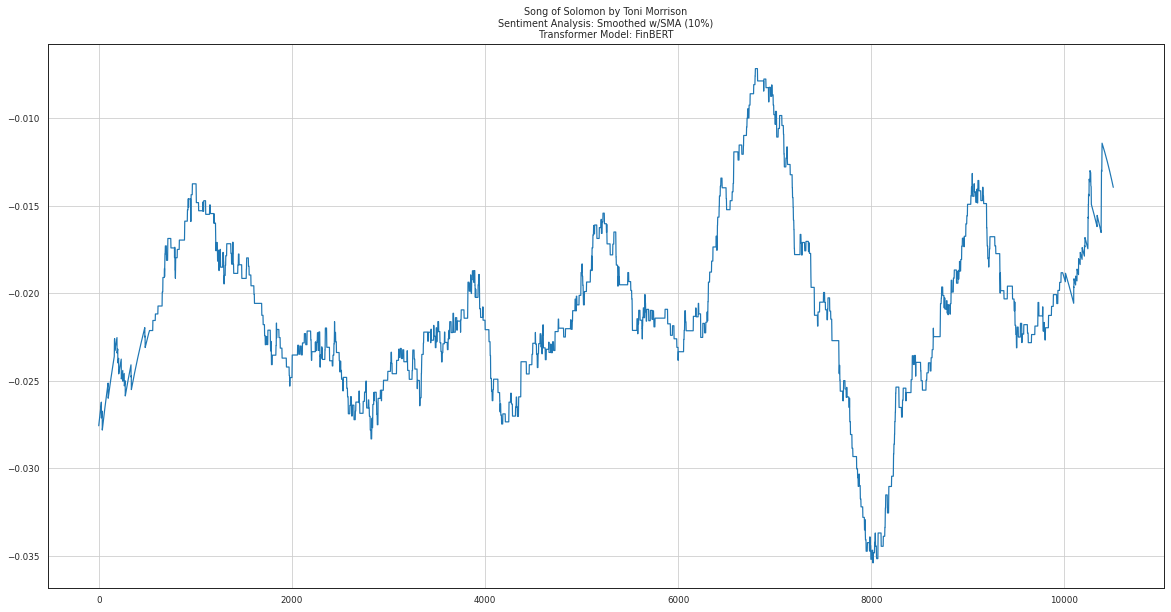

In [ ]:
# Verify Plausiblity of new Sentiment Values by Plotting

novel_indx = 0
corpus_text_str = corpus_texts_ls[novel_indx]
# amodel_str = 'huggingface' 
win_aper = 10

win_per = int((win_aper/100.)*global_vars.corpus_texts_dt[corpus_text_str][model_name].shape[0])
text_title_str = f"{global_vars.corpus_titles_dt[corpus_text_str][0]}\nSentiment Analysis: Smoothed w/SMA ({win_aper}%)\n{model_type} Model: {model_title}"
global_vars.corpus_texts_dt[corpus_text_str][model_name].rolling(win_per, center=True, min_periods=0).mean().plot(title=text_title_str)
plt.grid(True)
plt.show();

In [ ]:
global_vars.corpus_texts_dt[corpus_text_str].head()

text_raw  \
0  The North Carolina Mutual Life Insurance agent promised to fly from Mercy to the other side of L...   
1  Two days before the event was to take place he tacked a note on the door of his little yellow ho...   
2  At 3:00 p.m. on Wednesday the 18th of February, 1931, I will take off from Mercy and fly away on...   
3                                                                                   Please forgive me.   
4                                                                                     I loved you all.   

                                                                                            text_clean  \
0  the north carolina mutual life insurance agent promise to fly from mercy to the other side of la...   
1      two day before the event be to take place he tack a note on the door of his little yellow house   
2     at p be on wednesday the 18th of february i will take off from mercy and fly away on my own wing   
3                                                                                    please forgive me   
4                                                                                       i love you all   

   distilbertfinnews  finbert  
0                0.0      0.0  
1                0.0      0.0  
2                0.0      0.0  
3                0.0      0.0  
4                0.0      0.0

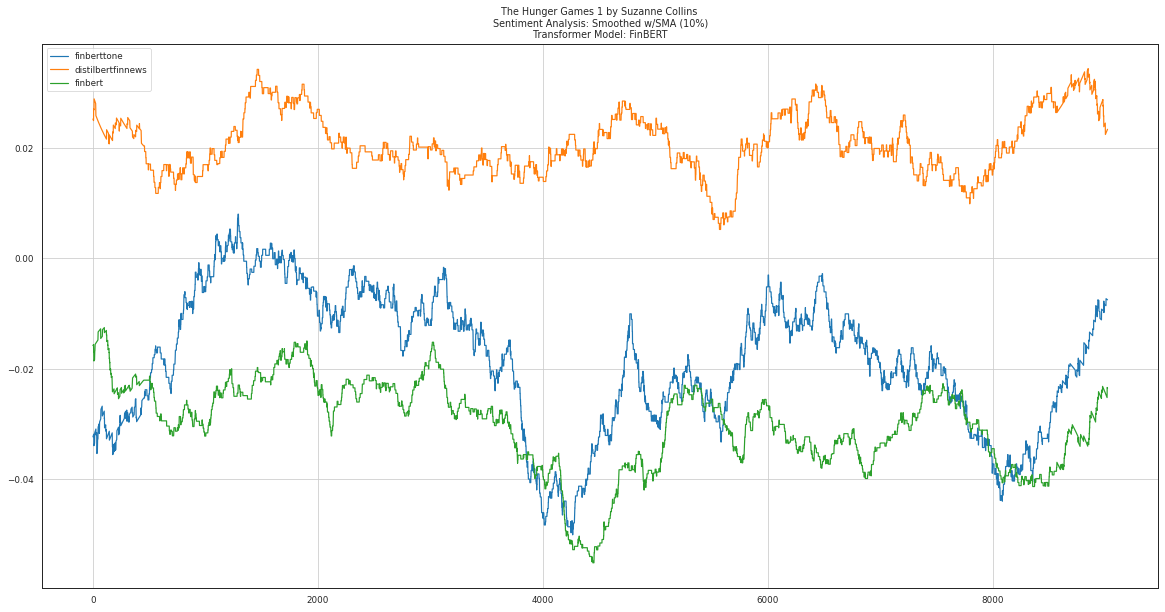

In [ ]:
# Plot all models

novel_indx = 0
corpus_text_str = corpus_texts_ls[novel_indx]
win_aper = 10

models_all_ls = list(global_vars.corpus_texts_dt[corpus_text_str].select_dtypes(include=[np.float,np.int]).columns)

win_per = int((win_aper/100.)*global_vars.corpus_texts_dt[corpus_text_str][model_name].shape[0])
text_title_str = f"{global_vars.corpus_titles_dt[corpus_text_str][0]}\nSentiment Analysis: Smoothed w/SMA ({win_aper}%)\n{model_type} Model: {model_title}"
global_vars.corpus_texts_dt[corpus_text_str][models_all_ls].rolling(win_per, center=True, min_periods=0).mean().plot(title=text_title_str)
plt.grid(True)
plt.show();

### **Save Checkpoint**

In [ ]:
# Verify in SentimentArcs Root Directory
os.chdir(Path_to_SentimentArcs)

print('Currently in SentimentArcs root directory:')
!pwd

print(f'Saving Text_Type: {Corpus_Genre}')
print(f'     Corpus_Type: {Corpus_Type}')

# Verify Subdir to save Cleaned Texts and Texts into..

print(f'\nThese Text Titles:\n')
global_vars.corpus_texts_dt.keys()

print(f'\nTo This Subdirectory:\n')
PATH_SENTIMENT_RAW


# Save sentiment values to subdir_sentiments

# os.chdir(Path_to_SentimentArcs)

if Corpus_Type == 'new':
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_corpus{Corpus_Number}_transformer_finbert.json'
else:
  save_filename = f'sentiment_raw_{Corpus_Genre}_{Corpus_Type}_reference_transformer_finbert.json'

write_dict_dfs(global_vars.corpus_texts_dt, out_file=save_filename, out_dir=f'{PATH_SENTIMENT_RAW}')



Currently in SentimentArcs root directory:
/gdrive/MyDrive/sentimentarcs_notebooks
Saving Text_Type: novels
     Corpus_Type: new

These Text Titles:



dict_keys(['tmorrison_songofsolomon', 'cliu_threebodyproblem', 'sking_doctorsleep'])


To This Subdirectory:



'./sentiment_raw/sentiment_raw_novels_new_corpus2/'

Saving file to: ./sentiment_raw/sentiment_raw_novels_new_corpus2/sentiment_raw_novels_new_corpus2_transformer_finbert.json


In [ ]:
# Verify json file created

!ls -altr $PATH_SENTIMENT_RAW

total 121383
-rw------- 1 root root 14021322 Apr 10 17:52 sentiment_raw_novels_new_syuzhetr2sentimentr.json
-rw------- 1 root root 12429118 Apr 10 17:52 sentiment_raw_novels_new_lex2ml.json
-rw------- 1 root root  9229919 Apr 10 17:52 sentiment_raw_novels_new_dnn2transformers.json
-rw------- 1 root root 12429117 Apr 10 17:52 all_novels_new_pymodels.json
-rw------- 1 root root  6132374 Apr 10 18:51 all_novels_new_4syuzhetr.json
-rw------- 1 root root 13714971 Apr 10 18:58 all_novels_new_4sentimentr.json
-rw------- 1 root root  4418949 Apr 12 18:21 sentiment_raw_novels_new_corpus1_transformer_huggingface.json
-rw------- 1 root root  5235491 Apr 12 18:48 sentiment_raw_novels_new_corpus1_transformer_nlptown.json
-rw------- 1 root root  5675849 Apr 12 20:31 sentiment_raw_novels_new_corpus1_transformer_yelp.json
-rw------- 1 root root  6192791 Apr 12 20:57 sentiment_raw_novels_new_corpus1_transformer_hinglish.json
-rw------- 1 root root  4027249 Apr 12 22:01 sentiment_raw_novels_new_corpus1_

# **END OF NOTEBOOK**